<a href="https://colab.research.google.com/github/brainopensource/datascience-mvp/blob/ml-analytics-mvp/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning & Analytics

Para conclusão da Sprint da **Pós-Graduação em Ciência de Dados e Analytics** (PUC Rio)

**Aluno**: Lucas da S. Rocha


# Introdução

Este notebook apresenta o desenvolvimento de um **Mínimo Produto Viável (MVP)** como parte do segundo módulo da **Pós-Graduação em Ciência de Dados e Analytics** da **PUC-Rio**. O projeto utiliza dados abertos recentes sobre a produção de petróleo e gás no Brasil, fornecidos pela **Agência Nacional de Petróleo (ANP)**. Esses dados, originalmente disponibilizados pela ANP em arquivos separados por mês e por região (terra, mar e pré-sal), foram previamente agrupados e consolidados em um único repositório para facilitar a análise.

Como premissa inicial, este estudo foca exclusivamente em **campos offshore** (marítimos), buscando simplificar o escopo e alinhar o trabalho com os principais objetivos do setor analisado. A abordagem adotada no MVP visa demonstrar o potencial dos **modelos de machine learning** para prever a **produção futura** desses campos com uma granularidade mensal.


# Descrição do problema

O objetivo principal deste trabalho é desenvolver modelos de aprendizado de máquina para prever a produção futura de petróleo, gás e água nos próximos 12 meses, usando dados históricos de produção por campo. Além disso, será demonstrada a curva de produção acumulada projetada.

Premissas e hipóteses principais:

    - Somente campos com produção acumulada superior a 10.000 barris foram utilizados, para remover ruídos causados por campos pequenos e irrelevantes para a análise.
    - Dados foram agregados por campo, com granularidade máxima disponível em nível mensal.
    - Utilizou-se como atributos principais os valores mensais de produção de óleo, gás, água, o tempo de produção em meses e o identificador do campo.

# Descrição do Dataset

Os dados brutos utilizados neste projeto consistem em informações sobre a produção de petróleo e gás natural em campos offshore no Brasil. Eles foram extraídos de arquivos abertos fornecidos pela **ANP** e consolidados em um único dataset para facilitar a análise e a modelagem. Abaixo estão os principais atributos e suas descrições:

---

## Estrutura do Dataset

### Atributos Categóricos:

- **estado**: Estado onde está localizado o campo (e.g., Rio de Janeiro).
- **bacia**: Nome da bacia sedimentar onde o poço está situado (e.g., Santos).
- **nome_poco_anp**: Nome oficial do poço registrado na ANP (e.g., 9-BRSA-716-RJS).
- **campo**: Nome do campo de produção (e.g., TUPI).

---

### Atributos Temporais:

- **periodo**: Data de referência da produção no formato AAAA-MM-DD.
- **ano**: Ano de produção (e.g., 2011).
- **mes**: Mês de produção (e.g., 1).

---

### Atributos Numéricos:

- **oleo_kbd**: Produção de óleo em milhares de barris por dia (kbd).
- **condensado_kbd**: Produção de condensado em milhares de barris por dia (kbd).
- **petroleo_kbd**: Soma da produção de óleo e condensado em milhares de barris por dia (kbd).
- **gas_natural_mmscf_assoc**: Volume de gás natural associado produzido, em milhões de pés cúbicos por dia (MMSCF/d).
- **gas_natural_mmscf_nassoc**: Volume de gás natural não associado produzido, em MMSCF/d.
- **gas_natural_mmscf_total**: Soma do gás natural associado e não associado, em MMSCF/d.
- **agua_kbd**: Produção de água em milhares de barris por dia (kbd).
- **tempo_producao_hspormes**: Total de horas em que o poço esteve em produção durante o mês.

---


# Metodologia

Os dados foram organizados e preparados da seguinte forma:

  - Divisão dos dados: Dataset separado em conjuntos de treino (70%) e teste (30%). Não foi realizada validação cruzada devido à natureza temporal dos dados, preservando a sequência cronológica para evitar vazamento de informações.

  - Transformações aplicadas:
      Neste projeto, optamos por não aplicar normalização ou padronização nos dados devido à característica das variáveis de entrada, que possuem ordens de grandeza semelhantes. As variáveis de produção de óleo, gás natural e água estão todas em unidades comparáveis, como milhares de barris por dia para o óleo e a água, e milhões de pés cúbicos por dia para o gás. Dessa forma, os dados apresentam escalas compatíveis e podem ser analisados sem a necessidade de transformação. Essas variáveis podem ser visualizadas no mesmo gráfico sem a presença de discrepâncias em sua magnitude, o que indica que não há necessidade de normalização.

      Além disso, os modelos utilizados no estudo, como Gradient Boosting e Redes Neurais, lidam de forma diferente com os dados em escalas variadas. As árvores de decisão (como no caso do Gradient Boosting) são invariantes a transformações de escala, ou seja, elas não necessitam de normalização. Isso ocorre porque o modelo é baseado em divisões binárias dos dados, e essas divisões não são influenciadas pela magnitude das variáveis. Já as Redes Neurais, embora sensíveis à escala, também foram treinadas sem normalização. Mesmo que fosse possível aplicar essa transformação, optamos por manter a consistência nos tratamentos dos dados entre os modelos, já que o modelo de Redes Neurais com otimização de hiperparâmetros (como o tamanho das camadas ocultas e funções de ativação) mostrou um desempenho satisfatório sem a necessidade dessa etapa adicional.

  - Seleção de features:
      Na primeira etapa, foram utilizados apenas o tempo, o campo e a produção de óleo.
      Na etapa de refinamento, incorporaram-se dados de gás e água para melhor performance.

# Modelagem e Treinamento

1) **Modelos treinados para resolver o problema de previsão de produção futura**:

  - **Regressão Linear**: Escolha inicial por ser um modelo simples e interpretável.
  - **Gradient Boosting**: Explorou padrões complexos nos dados, com boa performance.
  - **LightGBM**: Excelente para lidar com datasets maiores e atributos adicionais.
  - **Rede Neural**: Modelo mais avançado, capaz de capturar relações não lineares nos dados.

---

2) **Ajustes e otimizações**:

  Na segunda etapa, os modelos foram ajustados para incluir hiperparâmetros otimizados.

  **Hyperparameter tuning**: Foi aplicado nos melhores modelos (**LightGBM** e **Rede Neural**), usando técnicas como **busca em grid** para maximizar o desempenho usando os parâmetros ideais.

---

3) **Análise de Precisão**:

  A metodologia proposta para avaliação dos modelos segue uma abordagem em **duas etapas**:

  - **Análise inicial**: Na fase inicial, utilizamos o **R²** como a principal métrica de avaliação. O **R²** é uma métrica que indica a **proporção da variabilidade dos dados** que é explicada pelo modelo, sendo uma excelente ferramenta para entender o quanto o modelo consegue capturar as **tendências** e os **padrões subjacentes** da série temporal.

  Em séries temporais, onde a captura de padrões como **sazonalidade**, **tendências** e **dependências temporais** é fundamental, o **R²** permite uma primeira análise da **qualidade explicativa** do modelo e é útil para verificar se o modelo está conseguindo lidar com a **variabilidade dos dados**.

  - **Fase de Hyperparameter Tuning**: Após a etapa de **feature engineering**, onde o foco está na melhoria da modelagem a partir das variáveis, e especialmente durante a etapa de **hyperparameter tuning**, a métrica de avaliação para escolha será alterada para **MSE** (Erro Quadrático Médio). Porém irei avaliar o **MAE** por fins de estudo.

  Essas métricas são mais diretamente relacionadas ao **desempenho preditivo** do modelo, pois medem a diferença entre as previsões e os valores reais, penalizando os **erros de previsão**. O **MSE** é particularmente útil por dar mais peso a grandes erros, enquanto o **MAE** oferece uma visão mais **robusta e intuitiva** dos erros médios, sem exagerar os erros maiores.

  Ao otimizar os **hiperparâmetros**, a prioridade é melhorar a **capacidade do modelo em gerar previsões mais precisas**, e não apenas em explicar a variabilidade dos dados.

---


# Código do MVP

## Importação de Bibliotecas

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import warnings
import missingno as msno
import re

## Configuração do Ambiente

Configurações estéticas do pandas para limitar o máximo de linhas, colunas e filtrar avisos.

In [47]:
# Definindo o limite de exibição colunas de dataframe para None (sem limite)
pd.set_option('display.max_columns', 30)

# Definindo o limite de exibição de linhas de dataframe para 48
pd.set_option('display.max_rows', 145)

# Filter warnings
warnings.filterwarnings('ignore')

## Funções Auxiliares e Variáveis Globais

In [48]:
###################################
####### FUNÇÕES AUXILIARES ########
###################################

def calc_tempo_produzindo(df):
  """
    Calcula o tempo total de produção em meses para cada registro no DataFrame,
    com base no período mínimo de produção registrado por campo.

    Parâmetros:
    -----------
    df : pandas.DataFrame
        DataFrame contendo informações de produção, incluindo as colunas:
        - 'campo' (identificação do campo de produção)
        - 'periodo' (data do registro de produção, no formato datetime)

    Retorno:
    --------
    pandas.DataFrame
        O DataFrame original com duas novas colunas:
        - 'data_inicio': Data mínima de início de produção por campo.
        - 'tempo_total_producao_meses': Tempo total de produção em meses
          calculado para cada registro desde o início.
    # Encontrar a data mínima de produção por campo
    min_dates = df.groupby('campo')['periodo'].transform('min')  # Transform para alinhar ao DataFrame original
    """

  # Encontrar a data mínima de produção por campo
  min_dates = df.groupby('campo')['periodo'].transform('min')  # Transform para alinhar ao DataFrame original

  # Adicionar a data mínima ao DataFrame original
  df['data_inicio'] = min_dates

  # Calcular o tempo total de produção em meses para cada registro
  df['tempo_total_producao_meses'] = ((df['periodo'].dt.year - df['data_inicio'].dt.year) * 12 +
                                        (df['periodo'].dt.month - df['data_inicio'].dt.month))

  return df


# Função para gerar sequência de meses por campo
def completar_meses(df):
    df_complete = []
    for campo in df['campo'].unique():
        df_campo = df[df['campo'] == campo]

        # Gerar todos os meses do 1 até o máximo de 'tempo_total_producao_meses'
        max_meses = df_campo['tempo_total_producao_meses'].max()
        meses_completos = pd.DataFrame({'tempo_total_producao_meses': np.arange(1, max_meses + 1)})

        # Mesclar com os dados originais e preencher valores ausentes
        df_campo_completo = pd.merge(meses_completos,
                                     df_campo,  # Inclui todas as colunas do df original
                                     how='left',
                                     on='tempo_total_producao_meses')

        # Preencher valores ausentes com 0 ou outra estratégia
        for col in df_campo.columns:
            if col not in ['campo', 'tempo_total_producao_meses']:
                df_campo_completo[col] = df_campo_completo[col].fillna(0)

        # Garantir que a coluna 'campo' permaneça
        df_campo_completo['campo'] = campo

        df_complete.append(df_campo_completo)
    return pd.concat(df_complete, ignore_index=True)


# Função para dividir os dados em treino e teste
def dividir_treino_teste(df, proporcao_treino=0.7):
    dfs_train, dfs_test = [], []

    for campo in df['campo'].unique():
        df_campo = df[df['campo'] == campo].sort_values(by='tempo_total_producao_meses')

        # Índice de corte baseado na proporção definida
        corte = int(len(df_campo) * proporcao_treino)
        dfs_train.append(df_campo.iloc[:corte])
        dfs_test.append(df_campo.iloc[corte:])

    return pd.concat(dfs_train, ignore_index=True), pd.concat(dfs_test, ignore_index=True)


# Função para fazer One-Hot Encoding e adicionar ao DataFrame
def aplicar_one_hot_encoding(df_train_final, df_test_final, features_list = ['tempo_total_producao_meses', 'gas_natural_mmscf_total_total', 'agua_kbd_total']):
    # Inicializando o OneHotEncoder (drop_first=True para evitar multicolinearidade)
    encoder = OneHotEncoder(drop='first', sparse_output=False)

    # Ajustando o encoder com os dados de treino (ajustando para as categorias presentes em df_train_final)
    X_train_encoded = encoder.fit_transform(df_train_final[['campo']])

    # Transformando o conjunto de teste com o encoder ajustado (usando o mesmo encoding do treino)
    X_test_encoded = encoder.transform(df_test_final[['campo']])

    # Convertendo os resultados em DataFrames para facilitar a manipulação
    X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['campo']))
    X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['campo']))

    # Adicionando as colunas numéricas (como 'tempo_total_producao_meses', 'gas_natural_mmscf_total_total', 'agua_kbd_total') aos datasets de treino e teste
    X_train = pd.concat([df_train_final[features_list].reset_index(drop=True), X_train_encoded_df], axis=1)
    X_test = pd.concat([df_test_final[features_list].reset_index(drop=True), X_test_encoded_df], axis=1)

    # Separando a variável target 'oleo_kbd_total' (ou qualquer outra variável alvo)
    y_train = df_train_final['oleo_kbd_total']
    y_test = df_test_final['oleo_kbd_total']

    return X_train, X_test, y_train, y_test


###################################
####### VARIÁVEIS GLOBAIS #########
###################################

# Data de referência da última produção presente no dado
data_referencia = pd.to_datetime('2024-06-01')

campos_teste = ['MARLIM SUL', 'TUPI', 'MERO', 'ATLANTA']

num_meses_futuro = 12  # Número de meses para prever

# Definir um limiar para produção baixa
limiar_producao = 3 * 1e3  # Exemplo de limiar

## Criando dataframe
Os datasets obtidos de dados abertos da ANP foram compilados num arquivo de formato 'parquet'. Ele contem dados de 1980 até 2024 com as produções por poços em campos offshore na costa Brasileira.

Foram usadas técnicas de pré-processamento do módulo lecionado no trimestre anterior, fazendo uso dos conceitos apresentados para preparar o dataset pra ser utilizado posteriormente.

Conforme sugerido, os dados foram disponibilizados publicamente no repositório do Github e lidos no formato Raw.

[Link do Repositório](https://github.com/brainopensource/datascience-mvp)

[Fonte de Informação de dados abertos](https://cdp.anp.gov.br/ords/r/cdp_apex/consulta-dados-publicos-cdp/consulta-produ%C3%A7%C3%A3o-por-po%C3%A7o)

In [49]:
url = "https://raw.githubusercontent.com/brainopensource/datascience-mvp/refs/heads/ml-analytics-mvp/datasets/monthly_production_concat/1980_2024_BR_production_data.parquet"

df_prod_base = pd.read_parquet(url).reset_index(drop=True)

# Exibindo um subset com os dados referente ao campo TUPI e seus tipos de dados por coluna
display(df_prod_base[df_prod_base['campo'] == 'TUPI'].head(5))

print(df_prod_base.dtypes)

,estado,bacia,nome_poco_anp,campo,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,agua_kbd,tempo_producao_hspormes,ano,mes
14,Rio de Janeiro,Santos,9-BRSA-716-RJS,TUPI,2011-01-01,13.188175,0.0,13.188175,21.049140,0.0,21.049140,0.0,0,2011,1
30,Rio de Janeiro,Santos,9-BRSA-716-RJS,TUPI,2011-02-01,14.871802,0.0,14.871802,24.602713,0.0,24.602713,0.0,0,2011,2
37,Rio de Janeiro,Santos,9-BRSA-716-RJS,TUPI,2011-03-01,14.601435,0.0,14.601435,24.307998,0.0,24.307998,0.0,0,2011,3
54,Rio de Janeiro,Santos,9-BRSA-716-RJS,TUPI,2011-04-01,21.318976,0.0,21.318976,36.219512,0.0,36.219512,0.0,0,2011,4
72,Rio de Janeiro,Santos,9-BRSA-716-RJS,TUPI,2011-05-01,28.436432,0.0,28.436432,44.274315,0.0,44.274315,0.0,0,2011,5


estado                              object
bacia                               object
nome_poco_anp                       object
campo                               object
periodo                     datetime64[ns]
oleo_kbd                           float64
condensado_kbd                     float64
petroleo_kbd                       float64
gas_natural_mmscf_assoc            float64
gas_natural_mmscf_nassoc           float64
gas_natural_mmscf_total            float64
agua_kbd                           float64
tempo_producao_hspormes              int64
ano                                  int32
mes                                  int32
dtype: object


In [50]:
# Criando uma cópia do dataframe e listando todos os campos presentes no registro
#df_prod = df_prod_base.copy(deep=True)
df_prod = df_prod_base
campos = df_prod['campo'].unique()
print(campos)

['PAMPO' 'CARATINGA' 'TRILHA' 'SAPINHOÁ' 'BADEJO' 'BARRACUDA' 'JUBARTE'
 'LINGUADO' 'TUPI' 'MARLIM LESTE' 'VOADOR' 'MARLIM' 'LAPA' 'BALEIA AZUL'
 'PIRAMBU' 'BÚZIOS' 'PEO-1BRSA1146RJS_Iara_Entorno_CCO' 'BALEIA FRANCA'
 'SÉPIA' 'BERBIGÃO' 'ATAPU' 'OESTE DE ATAPU' 'ITAPU' 'SURURU' 'MERO'
 'NORDESTE DE SAPINHOÁ' 'NOROESTE DE SAPINHOÁ' 'SUDOESTE DE SAPINHOÁ'
 'SUL DE TUPI' 'AnC_TUPI' 'TAMBUATÁ' 'AnC_BRAVA' 'ALBACORA'
 'AnC_NORTE_ATAPU' 'SÉPIA LESTE' 'BÚZIOS_ECO' 'AnC_MERO' 'SUL DE BERBIGÃO'
 'SÉPIA_ECO' 'ATAPU_ECO' 'MARLIM SUL' 'ITAPU_ECO' 'AnC_Forno' 'ESPADIM'
 'GUARICEMA' 'DOURADO' 'BONITO' 'ENCHOVA' 'GAROUPA' 'NAMORADO' 'CAÇÃO'
 'AGULHA' 'UBARANA' 'CAIOBA' 'CAMORIM' 'DOM JOÃO MAR' 'CANDEIAS'
 'AREA DO SES-2' 'ROBALO' 'AREA do BAS-37 (Licitado)' 'CURIMÃ'
 'GAROUPINHA' 'XARÉU' 'BICUDO' 'DOM JOÃO' 'TATUI' 'AREA DO RNS-36'
 'ESPADA' 'ITAPARICA' 'PARATI' 'CORVINA' 'ATUM' 'CHERNE' 'PIRAÚNA' 'BAGRE'
 'ÁREA DO RJS-150' 'ENCHOVA OESTE' 'ANEQUIM' 'VIOLA' 'MARIMBÁ' 'MORÉIA'
 'SALGO' 'ARATUM' 'NORDE

## Transformações iniciais

Nesse MVP iremos trabalhar com as produções por campo, agregando as produções de petróleo, água, gás e condensados por campo e por período mensal, pois é a granularidade da nossa base de dados.

In [51]:
# Converte a coluna 'periodo' para o formato datetime, tratando valores inválidos como NaT (Not a Time)
df_prod['periodo'] = pd.to_datetime(df_prod['periodo'], errors='coerce')

# Criando um mapeamento único de campo -> bacia
bacia_por_campo = df_prod[['campo', 'bacia']].drop_duplicates().set_index('campo')

# Agrupamento dos dados por campo
df_fields_prod = df_prod.groupby(['campo', 'periodo']).agg(
    oleo_kbd_total=('oleo_kbd', 'sum'),
    condensado_kbd_total=('condensado_kbd', 'sum'),
    petroleo_kbd_total=('petroleo_kbd', 'sum'),
    gas_natural_mmscf_assoc_total=('gas_natural_mmscf_assoc', 'sum'),
    gas_natural_mmscf_nassoc_total=('gas_natural_mmscf_nassoc', 'sum'),
    gas_natural_mmscf_total_total=('gas_natural_mmscf_total', 'sum'),
    agua_kbd_total=('agua_kbd', 'sum'),
    tempo_producao_hspormes_total=('tempo_producao_hspormes', 'sum')
).reset_index()

# Adicionar a coluna 'bacia' ao resultado final a partir do mapeamento
df_fields_prod['bacia'] = df_fields_prod['campo'].map(bacia_por_campo['bacia'])

# Exibir o DataFrame auxiliar
display(df_fields_prod.head(2))

,campo,periodo,oleo_kbd_total,condensado_kbd_total,petroleo_kbd_total,gas_natural_mmscf_assoc_total,gas_natural_mmscf_nassoc_total,gas_natural_mmscf_total_total,agua_kbd_total,tempo_producao_hspormes_total,bacia
0,ABALONE,2009-07-01,1.019355,0.0,1.019355,3.605638,0.0,3.605638,0.0,292,Campos
1,ABALONE,2009-08-01,0.670778,0.0,0.670778,2.061891,0.0,2.061891,0.0,178,Campos


In [52]:
# Calcular o número de dias em cada mês do período
df_fields_prod['dias_no_mes'] = df_fields_prod['periodo'].dt.days_in_month

# Calcular a produção total do mês em barris (KBD * dias_no_mes)
df_fields_prod['oleo_kb_total_mes'] = df_fields_prod['oleo_kbd_total'] * df_fields_prod['dias_no_mes']

# Calcular a produção acumulada campo
df_fields_prod['producao_acumulada'] = df_fields_prod.groupby('campo')['oleo_kb_total_mes'].cumsum()

# Ordenar o dado por período e por campo
df_fields_prod.sort_values(by=['periodo', 'campo'], inplace=True)

In [53]:
# Aplicar a função ao DataFrame e calcular o tempo total de produção do campo que sinaliza a maturidade do campo
df_fields_prod = calc_tempo_produzindo(df_fields_prod)

In [54]:
# Exibir algumas linhas para verificar as novas colunas
display(df_fields_prod.head(2))
display(df_fields_prod.tail(3))

,campo,periodo,oleo_kbd_total,condensado_kbd_total,petroleo_kbd_total,gas_natural_mmscf_assoc_total,gas_natural_mmscf_nassoc_total,gas_natural_mmscf_total_total,agua_kbd_total,tempo_producao_hspormes_total,bacia,dias_no_mes,oleo_kb_total_mes,producao_acumulada,data_inicio,tempo_total_producao_meses
180,AGULHA,1980-01-01,5.687206,0.0,5.687206,3.063783,0.0,3.063783,0.113075,0,Potiguar,31,176.303374,176.303374,1980-01-01,0
2512,AREA DO SES-2,1980-01-01,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,Sergipe,31,0.000000,0.000000,1980-01-01,0


,campo,periodo,oleo_kbd_total,condensado_kbd_total,petroleo_kbd_total,gas_natural_mmscf_assoc_total,gas_natural_mmscf_nassoc_total,gas_natural_mmscf_total_total,agua_kbd_total,tempo_producao_hspormes_total,bacia,dias_no_mes,oleo_kb_total_mes,producao_acumulada,data_inicio,tempo_total_producao_meses
30481,URUGUÁ,2024-06-01,2.185382,0.028356,2.213738,1.966330,1.082456,3.048785,2.742418,1486,Santos,30,65.561472,40221.729521,2010-07-01,167
30904,VERMELHO,2024-06-01,6.829628,0.000000,6.829628,0.881699,0.000000,0.881699,75.755939,10872,Campos,30,204.888846,173469.988896,1989-01-01,425
31643,VOADOR,2024-06-01,5.288838,0.000000,5.288838,5.505039,0.000000,5.505039,0.029656,923,Campos,30,158.665137,83415.079460,1992-11-01,379


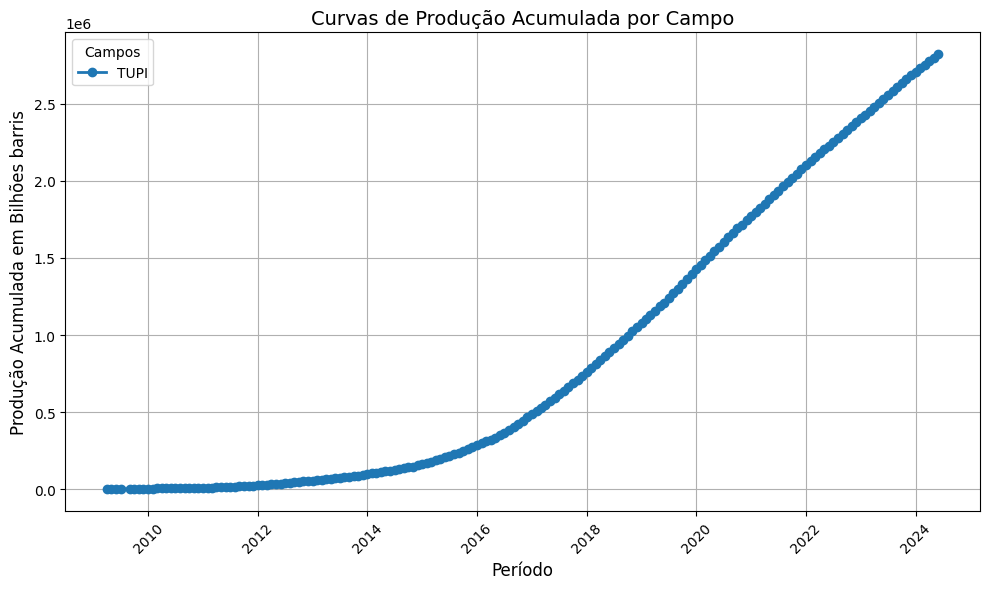

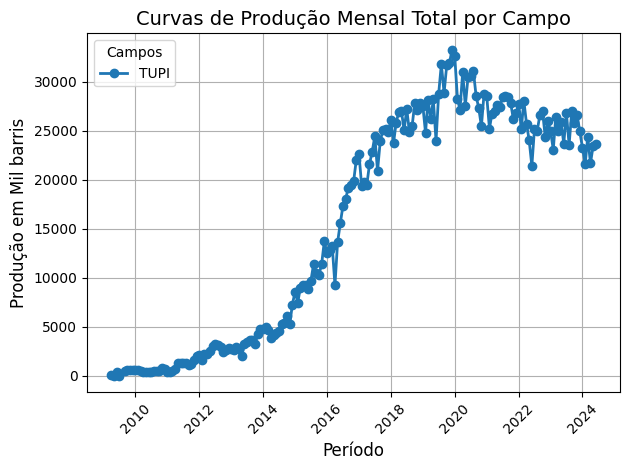

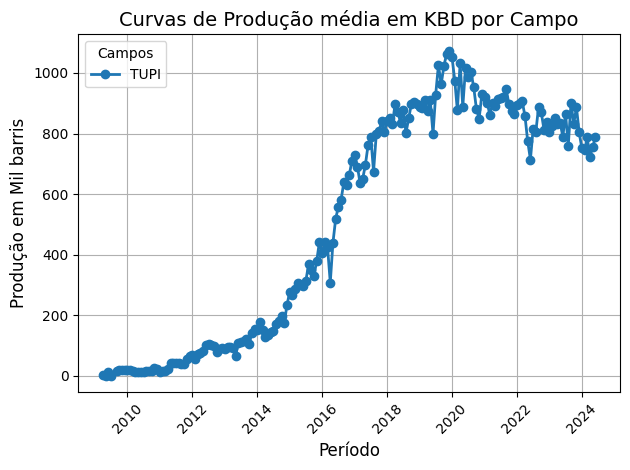

In [55]:
# Criar um gráfico de produção acumulada para TUPI
plt.figure(figsize=(10, 6))

# Plotar a produção acumulada
for campo in [campos_teste[1]]:
    df_campo = df_fields_prod[df_fields_prod['campo'] == campo]
    plt.plot(df_campo['periodo'], df_campo['producao_acumulada'], label=campo, linestyle='-', marker='o', linewidth=2)

    # Adicionar título, rótulos e legenda
    plt.title('Curvas de Produção Acumulada por Campo', fontsize=14)
    plt.xlabel('Período', fontsize=12)
    plt.ylabel('Produção Acumulada em Bilhões barris', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Campos', loc='upper left')

    # Exibir o gráfico
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotar a produção total mensal
for campo in [campos_teste[1]]:
    df_campo = df_fields_prod[df_fields_prod['campo'] == campo]
    plt.plot(df_campo['periodo'], df_campo['oleo_kb_total_mes'], label=campo, linestyle='-', marker='o', linewidth=2)

    # Adicionar título, rótulos e legenda
    plt.title('Curvas de Produção Mensal Total por Campo', fontsize=14)
    plt.xlabel('Período', fontsize=12)
    plt.ylabel('Produção em Mil barris', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Campos', loc='upper left')

    # Exibir o gráfico
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotar a produção média em KBD mensalmente
for campo in [campos_teste[1]]:
    df_campo = df_fields_prod[df_fields_prod['campo'] == campo]
    plt.plot(df_campo['periodo'], df_campo['oleo_kbd_total'], label=campo, linestyle='-', marker='o', linewidth=2)

    # Adicionar título, rótulos e legenda
    plt.title('Curvas de Produção média em KBD por Campo', fontsize=14)
    plt.xlabel('Período', fontsize=12)
    plt.ylabel('Produção em Mil barris', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Campos', loc='upper left')

    # Exibir o gráfico
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## MACHINE LEARNING

Nessa seção iremos treinar os modelos de Machine Learning usando as técnicas de Regressão Linear, Gradient Boosting,


Numa primeira versão do modelo iremos utilizar as features:
 - tempo em meses que o campo produz desde o primeiro óleo
 - produção de petróleo em mil barris
 - campo que produziu

In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
display(df_fields_prod.head(3))

,campo,periodo,oleo_kbd_total,condensado_kbd_total,petroleo_kbd_total,gas_natural_mmscf_assoc_total,gas_natural_mmscf_nassoc_total,gas_natural_mmscf_total_total,agua_kbd_total,tempo_producao_hspormes_total,bacia,dias_no_mes,oleo_kb_total_mes,producao_acumulada,data_inicio,tempo_total_producao_meses
180,AGULHA,1980-01-01,5.687206,0.0,5.687206,3.063783,0.0,3.063783,0.113075,0,Potiguar,31,176.303374,176.303374,1980-01-01,0
2512,AREA DO SES-2,1980-01-01,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,Sergipe,31,0.000000,0.000000,1980-01-01,0
6156,BONITO,1980-01-01,3.853138,0.0,3.853138,1.852973,0.0,1.852973,0.000000,0,Campos,31,119.447266,119.447266,1980-01-01,0


### Análise de Modelos

#### Preparação

In [58]:
# A coluna producao corresponde de petróleo em barris de cada campo em cada período e será o alvo de nosso estudo
df_fields = df_fields_prod[['campo', 'tempo_total_producao_meses', 'oleo_kbd_total', 'producao_acumulada']]

# Filtrar os campos que produzem abaixo do limiar
campos_filtrados = df_fields[df_fields['producao_acumulada'] >= limiar_producao]['campo']

# Filtrar o DataFrame original para manter apenas os campos com produção alta
df_fields = df_fields[df_fields['campo'].isin(campos_filtrados)]

print(campos_filtrados.to_list())

# Agrupar por 'campo' e pegar o valor máximo de 'producao_acumulada'
#df_max_producao_acumulada = df_fields_filtrado.groupby('campo')['producao_acumulada'].max().reset_index()

# Exibir a tabela com o valor máximo de produção acumulada para cada campo
#display(df_max_producao_acumulada.sort_values(by='producao_acumulada', ascending=False).reset_index().head(100))

# Removendo a coluna de produção acumulada pois não sera usada
df_fields = df_fields[['campo', 'tempo_total_producao_meses', 'oleo_kbd_total']]

['NAMORADO', 'NAMORADO', 'NAMORADO', 'UBARANA', 'DOM JOÃO MAR', 'ENCHOVA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'GUARICEMA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'GUARICEMA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'GUARICEMA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'GUARICEMA', 'NAMORADO', 'UBARANA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'GUARICEMA', 'NAMORADO', 'UBARANA', 'AGULHA', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'GUARICEMA', 'NAMORADO', 'UBARANA', 'AGULHA', 'BONITO', 'CAIOBA', 'DOM JOÃO MAR', 'ENCHOVA', 'GAROUPA', 'GUARICEMA', 'NAMORADO', 'UBARANA', 'AGULHA', '

In [59]:
# Passo 1: Gerar a sequência completa de meses para cada campo (de 1 até o máximo)
df_complete = []

for campo in df_fields['campo'].unique():
    df_campo = df_fields[df_fields['campo'] == campo]

    # Gerar todos os meses do 1 até o máximo de 'tempo_total_producao_meses'
    meses_completos = pd.DataFrame({'tempo_total_producao_meses': np.arange(1, df_campo['tempo_total_producao_meses'].max() + 1)})

    # Passo 2: Mesclar com o df original para garantir que todos os meses estão presentes
    df_campo_completo = pd.merge(meses_completos, df_campo[['campo', 'tempo_total_producao_meses', 'oleo_kbd_total']],
                                  how='left', on='tempo_total_producao_meses')

    # Passo 3: Preencher valores ausentes com zero
    df_campo_completo['oleo_kbd_total'] = df_campo_completo['oleo_kbd_total'].fillna(0)

    # Adicionar o campo identificador para manter a informação do campo
    df_campo_completo['campo'] = campo

    # Adicionar à lista completa
    df_complete.append(df_campo_completo)

# Concatenar os DataFrames de todos os campos
df_fields = pd.concat(df_complete, ignore_index=True)

# Exibir as primeiras linhas do DataFrame completo
display(df_fields.head(3))

,tempo_total_producao_meses,campo,oleo_kbd_total
0,1,AGULHA,5.643478
1,2,AGULHA,5.938798
2,3,AGULHA,6.361095


In [60]:
# Listas para armazenar os DataFrames de treino e teste
list_dfs_train = []
list_dfs_test = []

# Iterar sobre cada campo
for campo in df_fields['campo'].unique():

  # Filtrar os dados para o campo atual
  df_campo = df_fields[df_fields['campo'] == campo]

  # Ordenar por 'tempo_total_producao_meses' (ou 'periodo' se necessário)
  df_campo_sorted = df_campo.sort_values(by='tempo_total_producao_meses')

  # Determinar o índice de corte para 80% de dados para treino
  train_size = int(len(df_campo_sorted) * 0.8)

  # Separar os dados em treino (80%) e teste (20%)
  df_train = df_campo_sorted.iloc[:train_size]
  df_test = df_campo_sorted.iloc[train_size:]

  # Adicionar os DataFrames de treino e teste nas respectivas listas
  list_dfs_train.append(df_train)
  list_dfs_test.append(df_test)

  """
  # COMENTADO PARA AUMENTO DE PERFORMANCE DE EXECUÇÃO
  # Plotando os dados de treino e teste
  plt.figure(figsize=(10, 6))

  # Plot para dados de treino
  plt.plot(df_train['tempo_total_producao_meses'], df_train['oleo_kbd_total'],
            color='red', label='Treino', alpha=0.6)

  # Plot para dados de teste
  plt.plot(df_test['tempo_total_producao_meses'], df_test['oleo_kbd_total'],
            color='purple', label='Teste', alpha=0.6)

  # Títulos e rótulos
  plt.title(f'Campo: {campo} - Dados de Treino e Teste', fontsize=14)
  plt.xlabel('Tempo Total de Produção (Meses)', fontsize=12)
  plt.ylabel('Produção de Óleo (KBD)', fontsize=12)

  # Exibindo a legenda
  plt.legend()

  # Exibindo o gráfico
  plt.show()
  """

In [61]:
# Concatenar os DataFrames de treino e teste
df_train_final = pd.concat(list_dfs_train, ignore_index=True)
df_test_final = pd.concat(list_dfs_test, ignore_index=True)

# Mostrar os DataFrames finais para treino e teste
print("Dados de Treinamento:", df_train_final.shape)
print("Dados de Teste:", df_test_final.shape)
display(df_train_final.head(3))
display(df_test_final.head(3))

Dados de Treinamento: (22724, 3)
Dados de Teste: (5737, 3)


,tempo_total_producao_meses,campo,oleo_kbd_total
0,1,AGULHA,5.643478
1,2,AGULHA,5.938798
2,3,AGULHA,6.361095


,tempo_total_producao_meses,campo,oleo_kbd_total
0,408,AGULHA,0.403469
1,409,AGULHA,0.338869
2,410,AGULHA,0.351208


#### One-hot Encoding

In [62]:
# Inicializando o OneHotEncoder (drop_first=True para evitar multicolinearidade)
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ajustando o encoder com os dados de treino (ajustando para as categorias presentes em df_train_final)
X_train_encoded = encoder.fit_transform(df_train_final[['campo']])

# Transformando o conjunto de teste com o encoder ajustado (usando o mesmo encoding do treino)
X_test_encoded = encoder.transform(df_test_final[['campo']])

# Convertendo os resultados em DataFrames para facilitar a manipulação
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['campo']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['campo']))

# Adicionando de volta as colunas numéricas (tempo_total_producao_meses) aos datasets de treino e teste
X_train = pd.concat([df_train_final[['tempo_total_producao_meses']].reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([df_test_final[['tempo_total_producao_meses']].reset_index(drop=True), X_test_encoded_df], axis=1)

# Separando a variável target 'oleo_kbd_total' (ou qualquer outra variável alvo)
y_train = df_train_final['oleo_kbd_total']
y_test = df_test_final['oleo_kbd_total']

campo = campos_teste[0]

#### Treinamento de modelos

##### 1 Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
# Treinando o modelo Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model_linear.predict(X_test)

# Calculando as métricas de qualidade do modelo
mae_linear_a = mean_absolute_error(y_test, y_pred)
mse_linear_a = mean_squared_error(y_test, y_pred)
r2_linear_a = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f'MAE: {mae_linear_a}')
print(f'MSE: {mse_linear_a}')
print(f'R2: {r2_linear_a}')

MAE: 21.768064654165624
MSE: 2231.912664680709
R2: 0.6081455040655943


In [65]:
# Filtrando o DataFrame para o campo específico
df_campo = df_fields[df_fields['campo'] == campos_teste[0]]
display(df_campo.head(3))

# Encontrando o período máximo para esse campo
periodo_maximo = df_campo['tempo_total_producao_meses'].max()
print(f"O período máximo para o campo {campo} é: {periodo_maximo}")

# Definindo o tempo inicial (último mês registrado + 1)
tempo_total_producao_meses = periodo_maximo + 1

,tempo_total_producao_meses,campo,oleo_kbd_total
21064,1,MARLIM SUL,8.339476
21065,2,MARLIM SUL,7.972397
21066,3,MARLIM SUL,9.165045


O período máximo para o campo MARLIM SUL é: 362


O período máximo para o campo MARLIM SUL é: 362


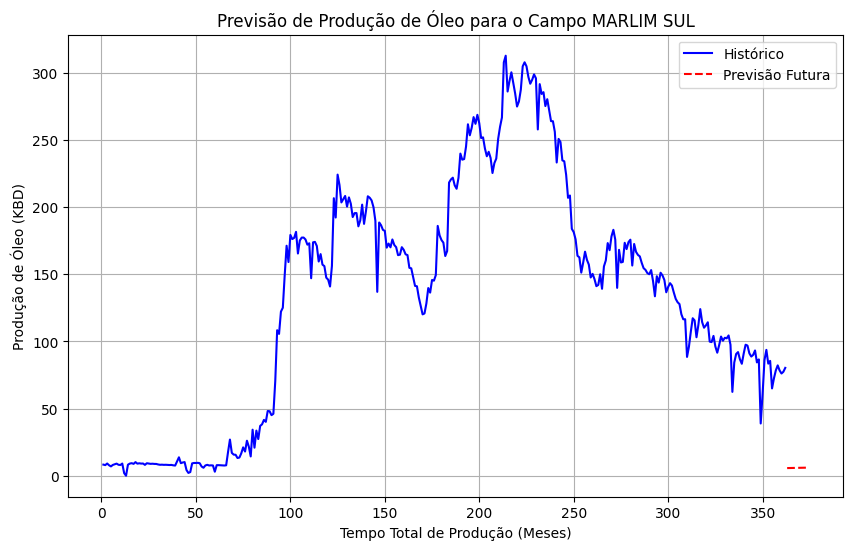

Previsão de produção para o campo MARLIM SUL no mês 374: 6.09 KBD


In [66]:
# Codificando a variável 'campo' com One-Hot Encoding
X = df_fields[['tempo_total_producao_meses', 'campo']]  # Features: tempo de produção e campo
y = df_fields['oleo_kbd_total']  # Alvo: produção de óleo

# Codificando 'campo' com One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Gerando previsões para os próximos 120 meses para cada campo
campos = df_fields['campo'].unique()  # Identificando os campos únicos

for campo in [campo]:
    # Filtrando o dataframe para o campo específico
    df_campo = df_fields[df_fields['campo'] == campo]

    # Encontrando o período máximo para esse campo
    periodo_maximo = df_campo['tempo_total_producao_meses'].max()
    print(f"O período máximo para o campo {campo} é: {periodo_maximo}")

    # Criando os dados para os próximos 120 meses
    tempo_total_producao_meses = periodo_maximo + 1  # Tempo inicial (último mês + 1)

    # Criando os dados para prever os próximos 120 meses
    X_futuro = pd.DataFrame({
        'tempo_total_producao_meses': [tempo_total_producao_meses + i for i in range(num_meses_futuro)],  # 120 meses
        'campo': [campo] * num_meses_futuro  # Repetindo o campo para todos os meses
    })

    # Aplicando o One-Hot Encoding para as variáveis
    X_futuro = pd.get_dummies(X_futuro, drop_first=True)

    # Garantindo que as colunas de X_futuro correspondam exatamente às de X (no caso da codificação)
    X_futuro = X_futuro.reindex(columns=X.columns, fill_value=0)

    # Fazendo a previsão para os próximos 120 meses
    y_futuro = model_linear.predict(X_futuro)

    # Exibindo o gráfico com o histórico e as previsões futuras
    plt.figure(figsize=(10, 6))
    plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total'], label='Histórico', color='blue')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro, label='Previsão Futura', color='red', linestyle='--')
    plt.title(f'Previsão de Produção de Óleo para o Campo {campo}')
    plt.xlabel('Tempo Total de Produção (Meses)')
    plt.ylabel('Produção de Óleo (KBD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Exibindo o resultado da previsão para o último mês
    print(f'Previsão de produção para o campo {campo} no mês {tempo_total_producao_meses + num_meses_futuro - 1}: {y_futuro[-1]:.2f} KBD')

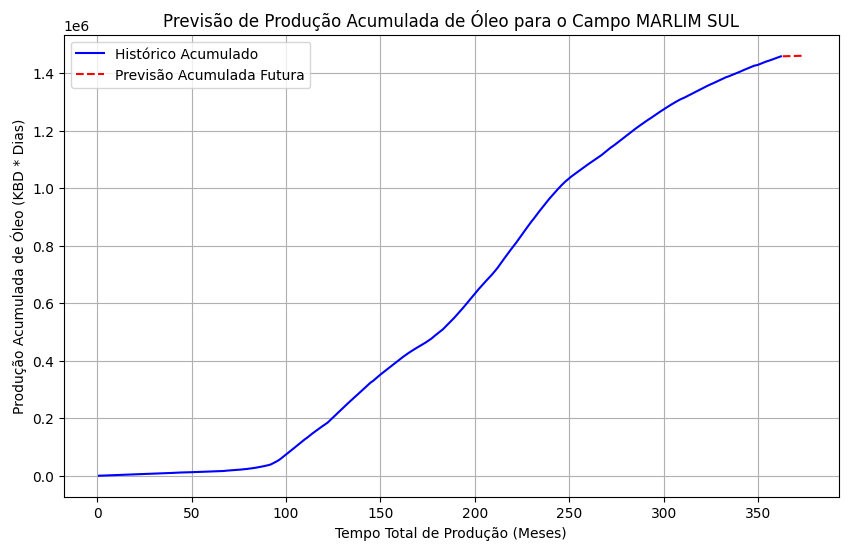

Previsão de produção acumulada para o campo MARLIM SUL no mês 374: 1459914.40 KBD * Dias


In [67]:
# Convertendo a produção para a base de dias
df_campo['oleo_kbd_total'] = df_campo['oleo_kbd_total'] * 30.42  # Convertendo para dias de maneira simplificada

# Calculando a produção acumulada histórica (para os meses históricos)
df_campo['oleo_kbd_total_acumulado'] = df_campo['oleo_kbd_total'].cumsum()

# Garantindo que a produção acumulada futura seja contínua (sem salto)
# A produção acumulada futura começa a partir da última produção acumulada histórica
y_acumulada_futura = y_futuro.cumsum() * 30.42  # Produção acumulada futura em dias
y_acumulada_futura = y_acumulada_futura + df_campo['oleo_kbd_total_acumulado'].iloc[-1]  # Somando ao último valor acumulado histórico

# Exibindo o gráfico com o histórico e as previsões acumuladas futuras de forma contínua
plt.figure(figsize=(10, 6))
plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total_acumulado'], label='Histórico Acumulado', color='blue')
plt.plot(X_futuro['tempo_total_producao_meses'], y_acumulada_futura, label='Previsão Acumulada Futura', color='red', linestyle='--')
plt.title(f'Previsão de Produção Acumulada de Óleo para o Campo {campo}')
plt.xlabel('Tempo Total de Produção (Meses)')
plt.ylabel('Produção Acumulada de Óleo (KBD * Dias)')
plt.legend()
plt.grid(True)
plt.show()

# Exibindo o resultado da previsão acumulada para o último mês
print(f'Previsão de produção acumulada para o campo {campo} no mês {tempo_total_producao_meses + num_meses_futuro - 1}: {y_acumulada_futura[-1]:.2f} KBD * Dias')


##### 2 Gradient Boosting

In [68]:
from xgboost import XGBRegressor

# Criando o modelo com os melhores parâmetros
model_gb_a = XGBRegressor(random_state=42)

model_gb_a.fit(X_train, y_train)

y_pred = model_gb_a.predict(X_test)

mae_gboost_a = mean_absolute_error(y_test, y_pred)
mse_gboost_a = mean_squared_error(y_test, y_pred)
r2_gboost_a = r2_score(y_test, y_pred)

print(f'MAE: {mae_gboost_a}')
print(f'MSE: {mse_gboost_a}')
print(f'R2: {r2_gboost_a}')

MAE: 8.187737283817194
MSE: 406.7662462841645
R2: 0.9285844894725691


O período máximo para o campo MARLIM SUL é: 362


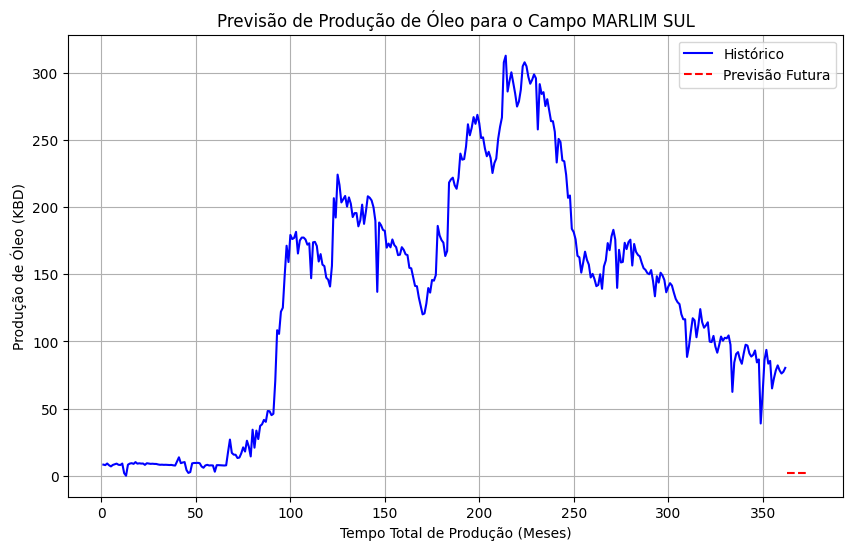

Previsão de produção para o campo MARLIM SUL no mês 374: 2.42 KBD


In [69]:
# Codificando a variável 'campo' com One-Hot Encoding
X = df_fields[['tempo_total_producao_meses', 'campo']]  # Features: tempo de produção e campo
y = df_fields['oleo_kbd_total']  # Alvo: produção de óleo

# Codificando 'campo' com One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Gerando previsões para os próximos 120 meses para cada campo
campos = df_fields['campo'].unique()  # Identificando os campos únicos

for campo in [campo]:
    # Filtrando o dataframe para o campo específico
    df_campo = df_fields[df_fields['campo'] == campo]

    # Encontrando o período máximo para esse campo
    periodo_maximo = df_campo['tempo_total_producao_meses'].max()
    print(f"O período máximo para o campo {campo} é: {periodo_maximo}")

    # Criando os dados para os próximos 120 meses
    tempo_total_producao_meses = periodo_maximo + 1  # Tempo inicial (último mês + 1)

    # Criando os dados para prever os próximos 120 meses
    X_futuro = pd.DataFrame({
        'tempo_total_producao_meses': [tempo_total_producao_meses + i for i in range(num_meses_futuro)],  # 120 meses
        'campo': [campo] * num_meses_futuro  # Repetindo o campo para todos os meses
    })

    # Aplicando o One-Hot Encoding para as variáveis
    X_futuro = pd.get_dummies(X_futuro, drop_first=True)

    # Garantindo que as colunas de X_futuro correspondam exatamente às de X (no caso da codificação)
    X_futuro = X_futuro.reindex(columns=X.columns, fill_value=0)

    # Fazendo a previsão para os próximos 120 meses
    y_futuro = model_gb_a.predict(X_futuro)

    # Exibindo o gráfico com o histórico e as previsões futuras
    plt.figure(figsize=(10, 6))
    plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total'], label='Histórico', color='blue')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro, label='Previsão Futura', color='red', linestyle='--')
    plt.title(f'Previsão de Produção de Óleo para o Campo {campo}')
    plt.xlabel('Tempo Total de Produção (Meses)')
    plt.ylabel('Produção de Óleo (KBD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Exibindo o resultado da previsão para o último mês
    print(f'Previsão de produção para o campo {campo} no mês {tempo_total_producao_meses + num_meses_futuro - 1}: {y_futuro[-1]:.2f} KBD')

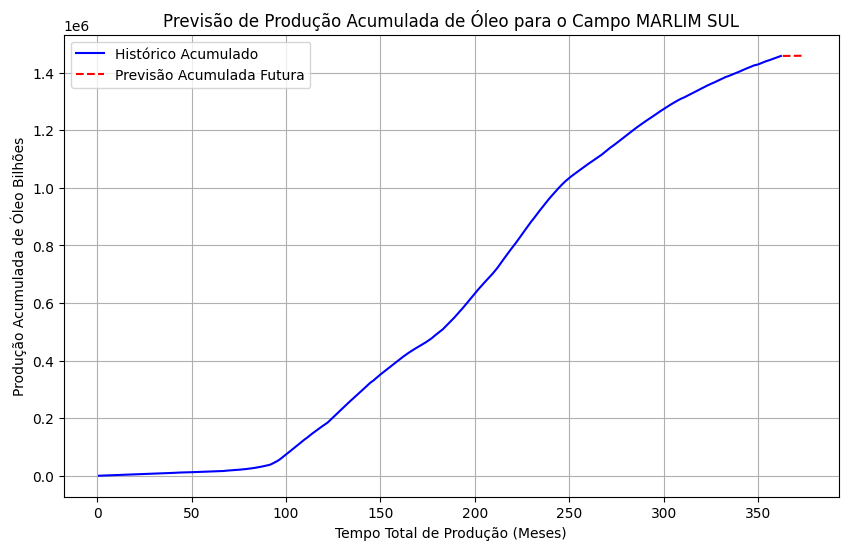

Previsão de produção acumulada para o campo MARLIM SUL no mês 374: 1458632.75 de Barris


In [70]:
# Convertendo a produção para a base de dias
df_campo['oleo_kbd_total'] = df_campo['oleo_kbd_total'] * 30.42  # Convertendo para dias

# Calculando a produção acumulada histórica (para os meses históricos)
df_campo['oleo_kbd_total_acumulado'] = df_campo['oleo_kbd_total'].cumsum()

# Garantindo que a produção acumulada futura seja contínua (sem salto)
# A produção acumulada futura começa a partir da última produção acumulada histórica
y_acumulada_futura = y_futuro.cumsum() * 30.42  # Produção acumulada futura em dias
y_acumulada_futura = y_acumulada_futura + df_campo['oleo_kbd_total_acumulado'].iloc[-1]  # Somando ao último valor acumulado histórico

# Exibindo o gráfico com o histórico e as previsões acumuladas futuras de forma contínua
plt.figure(figsize=(10, 6))
plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total_acumulado'], label='Histórico Acumulado', color='blue')
plt.plot(X_futuro['tempo_total_producao_meses'], y_acumulada_futura, label='Previsão Acumulada Futura', color='red', linestyle='--')
plt.title(f'Previsão de Produção Acumulada de Óleo para o Campo {campo}')
plt.xlabel('Tempo Total de Produção (Meses)')
plt.ylabel('Produção Acumulada de Óleo Bilhões')
plt.legend()
plt.grid(True)
plt.show()

# Exibindo o resultado da previsão acumulada para o último mês
print(f'Previsão de produção acumulada para o campo {campo} no mês {tempo_total_producao_meses + num_meses_futuro - 1}: {y_acumulada_futura[-1]:.2f} de Barris')


##### 3 LightGBM

In [71]:
from lightgbm import LGBMRegressor

# Criando e treinando o modelo LightGBM
model_lgbm_a = LGBMRegressor(random_state=42)
model_lgbm_a.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_lgbm = model_lgbm_a.predict(X_test)

# Avaliando o modelo
mae_lgbm_a = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm_a = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm_a = r2_score(y_test, y_pred_lgbm)

print(f'MAE: {mae_lgbm_a}')
print(f'MSE: {mse_lgbm_a}')
print(f'R2: {r2_lgbm_a}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 22724, number of used features: 99
[LightGBM] [Info] Start training from score 25.425751
MAE: 10.558746311308429
MSE: 845.239552159289
R2: 0.8516022047383368


O período máximo para o campo MARLIM SUL é: 362


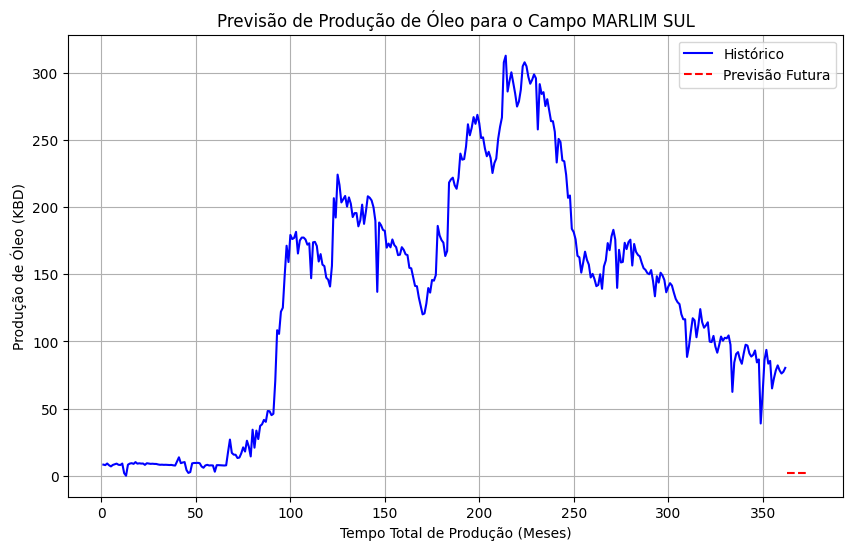

Previsão de produção para o campo MARLIM SUL no mês 374: 1.77 KBD


In [72]:
# Codificando a variável 'campo' com One-Hot Encoding
X = df_fields[['tempo_total_producao_meses', 'campo']]  # Features: tempo de produção e campo
y = df_fields['oleo_kbd_total']  # Alvo: produção de óleo

# Codificando 'campo' com One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Gerando previsões para os próximos 12 meses para cada campo
campos = df_fields['campo'].unique()  # Identificando os campos únicos

for campo in [campo]:
    # Filtrando o dataframe para o campo específico
    df_campo = df_fields[df_fields['campo'] == campo]

    # Encontrando o período máximo para esse campo
    periodo_maximo = df_campo['tempo_total_producao_meses'].max()
    print(f"O período máximo para o campo {campo} é: {periodo_maximo}")

    # Criando os dados para os próximos 120 meses
    tempo_total_producao_meses = periodo_maximo + 1  # Tempo inicial (último mês + 1)

    # Criando os dados para prever os próximos 120 meses
    X_futuro = pd.DataFrame({
        'tempo_total_producao_meses': [tempo_total_producao_meses + i for i in range(num_meses_futuro)],  # 120 meses
        'campo': [campo] * num_meses_futuro  # Repetindo o campo para todos os meses
    })

    # Aplicando o One-Hot Encoding para as variáveis
    X_futuro = pd.get_dummies(X_futuro, drop_first=True)

    # Garantindo que as colunas de X_futuro correspondam exatamente às de X (no caso da codificação)
    X_futuro = X_futuro.reindex(columns=X.columns, fill_value=0)

    # Fazendo a previsão para os próximos 120 meses
    y_futuro = model_lgbm_a.predict(X_futuro)

    # Exibindo o gráfico com o histórico e as previsões futuras
    plt.figure(figsize=(10, 6))
    plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total'], label='Histórico', color='blue')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro, label='Previsão Futura', color='red', linestyle='--')
    plt.title(f'Previsão de Produção de Óleo para o Campo {campo}')
    plt.xlabel('Tempo Total de Produção (Meses)')
    plt.ylabel('Produção de Óleo (KBD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Exibindo o resultado da previsão para o último mês
    print(f'Previsão de produção para o campo {campo} no mês {tempo_total_producao_meses + num_meses_futuro - 1}: {y_futuro[-1]:.2f} KBD')

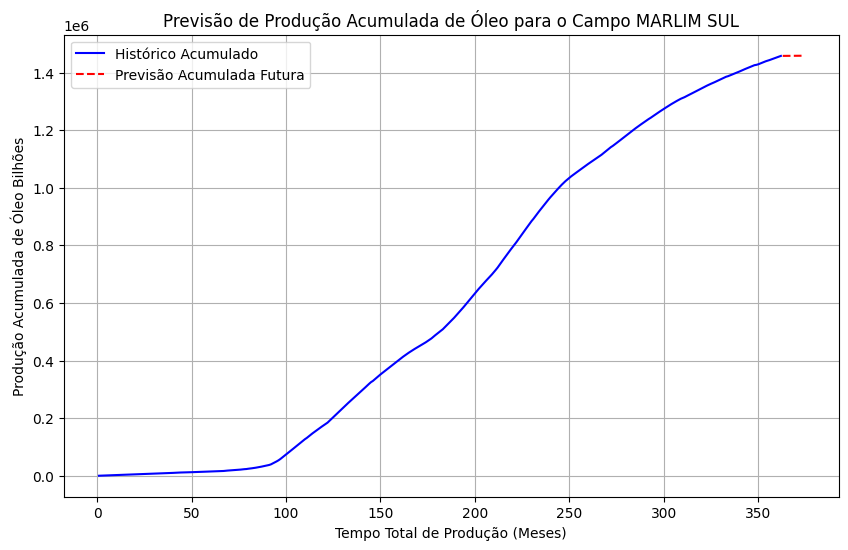

Previsão de produção acumulada para o campo MARLIM SUL no mês 374: 1458396.72 de Barris


In [73]:
# Convertendo a produção para a base de dias
df_campo['oleo_kbd_total'] = df_campo['oleo_kbd_total'] * 30.42  # Convertendo para dias

# Calculando a produção acumulada histórica (para os meses históricos)
df_campo['oleo_kbd_total_acumulado'] = df_campo['oleo_kbd_total'].cumsum()

# Garantindo que a produção acumulada futura seja contínua (sem salto)
# A produção acumulada futura começa a partir da última produção acumulada histórica
y_acumulada_futura = y_futuro.cumsum() * 30.42  # Produção acumulada futura em dias
y_acumulada_futura = y_acumulada_futura + df_campo['oleo_kbd_total_acumulado'].iloc[-1]  # Somando ao último valor acumulado histórico

# Exibindo o gráfico com o histórico e as previsões acumuladas futuras de forma contínua
plt.figure(figsize=(10, 6))
plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total_acumulado'], label='Histórico Acumulado', color='blue')
plt.plot(X_futuro['tempo_total_producao_meses'], y_acumulada_futura, label='Previsão Acumulada Futura', color='red', linestyle='--')
plt.title(f'Previsão de Produção Acumulada de Óleo para o Campo {campo}')
plt.xlabel('Tempo Total de Produção (Meses)')
plt.ylabel('Produção Acumulada de Óleo Bilhões')
plt.legend()
plt.grid(True)
plt.show()

# Exibindo o resultado da previsão acumulada para o último mês
print(f'Previsão de produção acumulada para o campo {campo} no mês {tempo_total_producao_meses + num_meses_futuro - 1}: {y_acumulada_futura[-1]:.2f} de Barris')


##### 4 Rede Neural

In [74]:
from sklearn.neural_network import MLPRegressor

# Criando e treinando o modelo de rede neural
model_ann_a = MLPRegressor(hidden_layer_sizes=(50,), max_iter=200, learning_rate_init=0.001, learning_rate='adaptive', random_state=42)

model_ann_a.fit(X_train, y_train)

# Fazendo previsões
y_pred_ann = model_ann_a.predict(X_test)

# Avaliando o modelo
mae_ann_a = mean_absolute_error(y_test, y_pred_ann)
mse_ann_a = mean_squared_error(y_test, y_pred_ann)
r2_ann_a = r2_score(y_test, y_pred_ann)
print(f'MAE: {mae_ann_a}')
print(f'MSE: {mse_ann_a}')
print(f'R2: {r2_ann_a}')

MAE: 28.7733540357458
MSE: 1710.5358614933132
R2: 0.6996830662820424


O período máximo para o campo MARLIM SUL é: 362


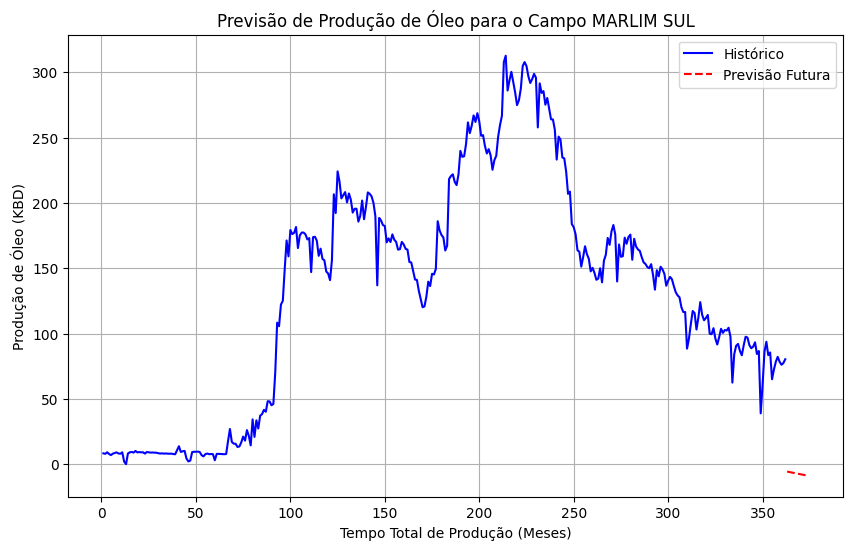

Previsão de produção para o campo MARLIM SUL no mês 374: -8.78 KBD


In [75]:
# Codificando a variável 'campo' com One-Hot Encoding
X = df_fields[['tempo_total_producao_meses', 'campo']]  # Features: tempo de produção e campo
y = df_fields['oleo_kbd_total']  # Alvo: produção de óleo

# Codificando 'campo' com One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Gerando previsões para os próximos 12 meses para cada campo
campos = df_fields['campo'].unique()  # Identificando os campos únicos

for campo in [campo]:
    # Filtrando o dataframe para o campo específico
    df_campo = df_fields[df_fields['campo'] == campo]

    # Encontrando o período máximo para esse campo
    periodo_maximo = df_campo['tempo_total_producao_meses'].max()
    print(f"O período máximo para o campo {campo} é: {periodo_maximo}")

    # Criando os dados para os próximos 120 meses
    tempo_total_producao_meses = periodo_maximo + 1  # Tempo inicial (último mês + 1)

    # Criando os dados para prever os próximos 120 meses
    X_futuro = pd.DataFrame({
        'tempo_total_producao_meses': [tempo_total_producao_meses + i for i in range(num_meses_futuro)],  # 120 meses
        'campo': [campo] * num_meses_futuro  # Repetindo o campo para todos os meses
    })

    # Aplicando o One-Hot Encoding para as variáveis
    X_futuro = pd.get_dummies(X_futuro, drop_first=True)

    # Garantindo que as colunas de X_futuro correspondam exatamente às de X (no caso da codificação)
    X_futuro = X_futuro.reindex(columns=X.columns, fill_value=0)

    # Fazendo a previsão para os próximos 120 meses
    y_futuro = model_ann_a.predict(X_futuro)

    # Exibindo o gráfico com o histórico e as previsões futuras
    plt.figure(figsize=(10, 6))
    plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total'], label='Histórico', color='blue')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro, label='Previsão Futura', color='red', linestyle='--')
    plt.title(f'Previsão de Produção de Óleo para o Campo {campo}')
    plt.xlabel('Tempo Total de Produção (Meses)')
    plt.ylabel('Produção de Óleo (KBD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Exibindo o resultado da previsão para o último mês
    print(f'Previsão de produção para o campo {campo} no mês {tempo_total_producao_meses + num_meses_futuro - 1}: {y_futuro[-1]:.2f} KBD')

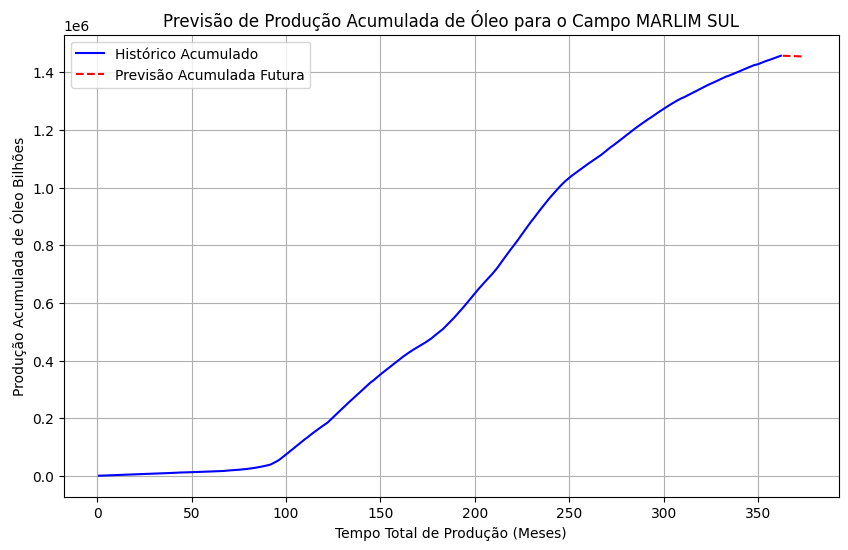

Previsão de produção acumulada para o campo MARLIM SUL no mês 374: 1455121.86 de Barris


In [76]:
# Convertendo a produção para a base de dias
df_campo['oleo_kbd_total'] = df_campo['oleo_kbd_total'] * 30.42  # Convertendo para dias

# Calculando a produção acumulada histórica (para os meses históricos)
df_campo['oleo_kbd_total_acumulado'] = df_campo['oleo_kbd_total'].cumsum()

# Garantindo que a produção acumulada futura seja contínua (sem salto)
# A produção acumulada futura começa a partir da última produção acumulada histórica
y_acumulada_futura = y_futuro.cumsum() * 30.42  # Produção acumulada futura em dias
y_acumulada_futura = y_acumulada_futura + df_campo['oleo_kbd_total_acumulado'].iloc[-1]  # Somando ao último valor acumulado histórico

# Exibindo o gráfico com o histórico e as previsões acumuladas futuras de forma contínua
plt.figure(figsize=(10, 6))
plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total_acumulado'], label='Histórico Acumulado', color='blue')
plt.plot(X_futuro['tempo_total_producao_meses'], y_acumulada_futura, label='Previsão Acumulada Futura', color='red', linestyle='--')
plt.title(f'Previsão de Produção Acumulada de Óleo para o Campo {campo}')
plt.xlabel('Tempo Total de Produção (Meses)')
plt.ylabel('Produção Acumulada de Óleo Bilhões')
plt.legend()
plt.grid(True)
plt.show()

# Exibindo o resultado da previsão acumulada para o último mês
print(f'Previsão de produção acumulada para o campo {campo} no mês {tempo_total_producao_meses + num_meses_futuro - 1}: {y_acumulada_futura[-1]:.2f} de Barris')


#### Comparação de precisão dos modelos iniciais

In [77]:
# Criando um dicionário com os resultados dos modelos
results = {
    'Modelo': ['LGBM', 'Gradient Boosting', 'Regressão Linear', 'Redes Neurais'],
    'MAE': [mae_lgbm_a, mae_gboost_a, mae_linear_a, mae_ann_a],
    'MSE': [mse_lgbm_a, mse_gboost_a, mse_linear_a, mse_ann_a],
    'R2': [r2_lgbm_a, r2_gboost_a, r2_linear_a, r2_ann_a]
}

# Criando um DataFrame com os resultados
df_results_v1 = pd.DataFrame(results)

# Exibindo o DataFrame
display(df_results_v1)

,Modelo,MAE,MSE,R2
0,LGBM,10.558746,845.239552,0.851602
1,Gradient Boosting,8.187737,406.766246,0.928584
2,Regressão Linear,21.768065,2231.912665,0.608146
3,Redes Neurais,28.773354,1710.535861,0.699683


### Otimização - Feature Engineering

In [78]:
# Engenharia de features

# Features para o modelo
lista_de_features = ['tempo_total_producao_meses', 'campo', 'oleo_kbd_total',
                     'gas_natural_mmscf_total_total', 'agua_kbd_total']

# Filtragem de campos com produção acumulada >= limiar
#limiar_producao = 1 * 1e3  # Exemplo de limiar
df_fields = df_fields_prod[df_fields_prod['producao_acumulada'] >= limiar_producao][lista_de_features]

# Preencher meses ausentes
df_fields = completar_meses(df_fields)

# Separar os dados
df_train, df_test = dividir_treino_teste(df_fields)

# Aplicando o One-Hot encoding na coluna 'campo'
X_train, X_test, y_train, y_test = aplicar_one_hot_encoding(df_train, df_test)

#### 2.b Gradient Boosting

In [79]:
# Criar e configurar o modelo Gradient Boosting
model_gb_b = XGBRegressor(random_state=42)

# Treinar o modelo
model_gb_b.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_gb_b.predict(X_test)

# Avaliar o modelo
mae_gboost_b = mean_absolute_error(y_test, y_pred)
mse_gboost_b = mean_squared_error(y_test, y_pred)
r2_gboost_b = r2_score(y_test, y_pred)

# Exibir métricas de avaliação
print(f"MAE: {mae_gboost_b:.2f}")
print(f"MSE: {mse_gboost_b:.2f}")
print(f"R²: {r2_gboost_b:.2f}")

MAE: 7.88
MSE: 874.27
R²: 0.87


#### 3.b LightGBM

In [80]:
from lightgbm import LGBMRegressor

# Criando e treinando o modelo LightGBM
model_lgbm_b = LGBMRegressor(random_state=42)
model_lgbm_b.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_lgbm = model_lgbm_b.predict(X_test)

# Avaliando o modelo
mae_lgbm_b = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm_b = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm_b = r2_score(y_test, y_pred_lgbm)

print(f'MAE: {mae_lgbm_b}')
print(f'MSE: {mse_lgbm_b}')
print(f'R2: {r2_lgbm_b}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 19878, number of used features: 99
[LightGBM] [Info] Start training from score 24.818848
MAE: 8.828655306738664
MSE: 944.2690842759715
R2: 0.8548568063184594


#### 4.b Rede Neural

In [81]:
# Criando e treinando o modelo de rede neural com múltiplas camadas
model_ann_b = MLPRegressor(hidden_layer_sizes=(100,),
                               max_iter=200,
                               learning_rate_init=0.001,
                               learning_rate='adaptive',
                               random_state=42)

# Treinando o modelo
model_ann_b.fit(X_train, y_train)

# Fazendo previsões
y_pred_ann_multi = model_ann_b.predict(X_test)

# Avaliando o modelo
mae_ann_b = mean_absolute_error(y_test, y_pred_ann_multi)
mse_ann_b = mean_squared_error(y_test, y_pred_ann_multi)
r2_ann_b = r2_score(y_test, y_pred_ann_multi)

# Exibindo as métricas
print(f'MAE: {mae_ann_b}')
print(f'MSE: {mse_ann_b}')
print(f'R²: {r2_ann_b}')

MAE: 8.042834106252016
MSE: 345.85026330072736
R²: 0.9468395051929938


#### Comparação visual dos modelos

O período máximo para o campo TUPI é: 182


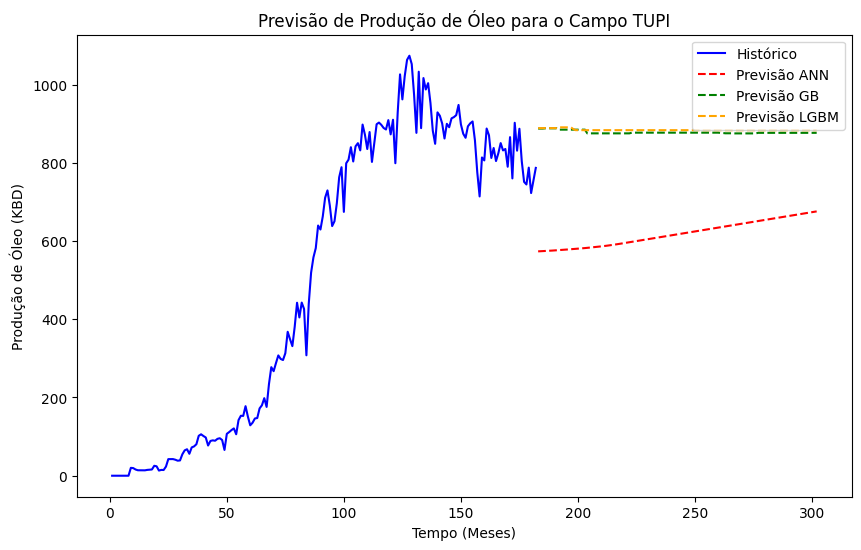

O período máximo para o campo MARLIM é: 399


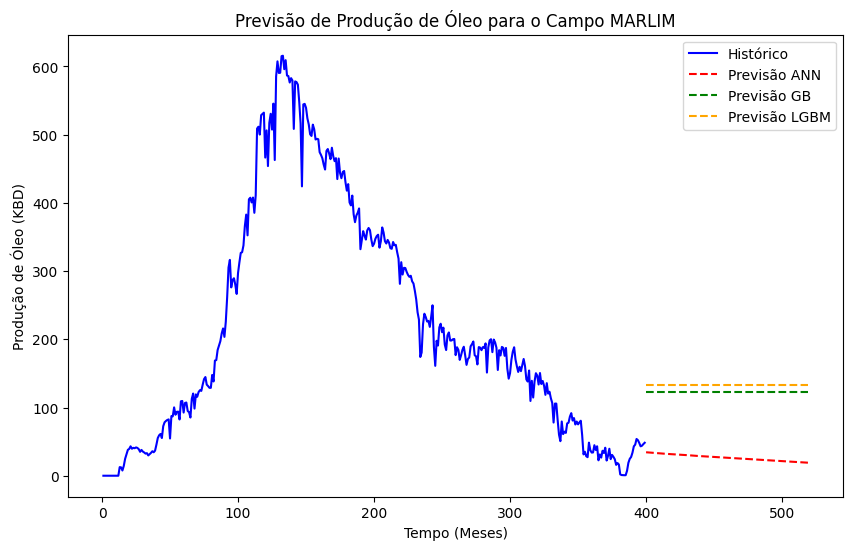

O período máximo para o campo RONCADOR é: 305


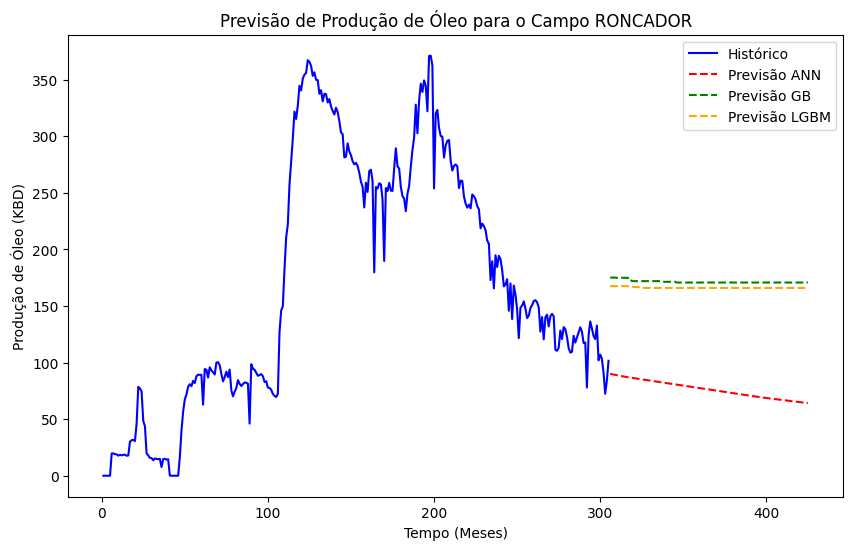

O período máximo para o campo MARLIM SUL é: 362


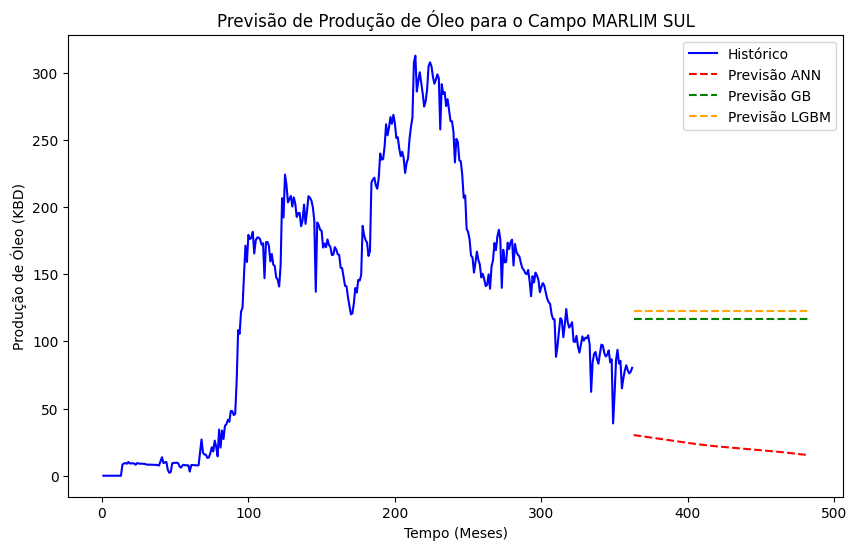

O período máximo para o campo ALBACORA é: 440


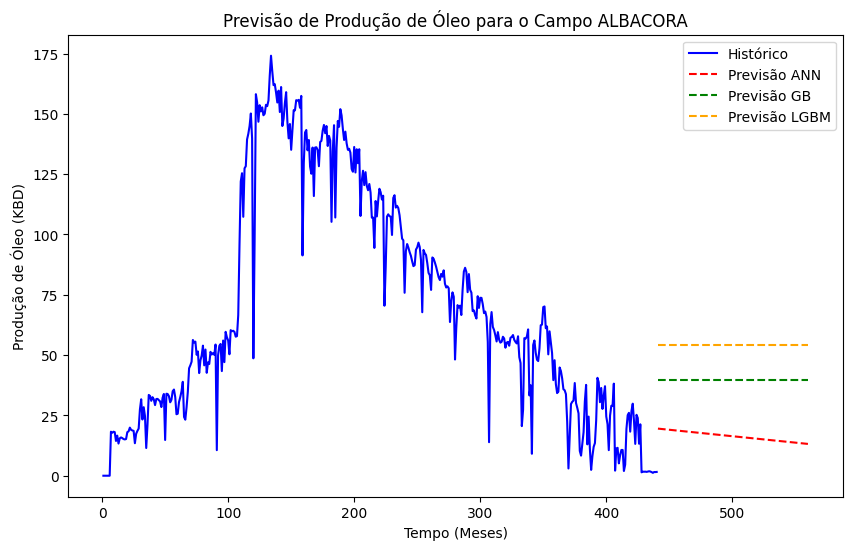

O período máximo para o campo JUBARTE é: 260


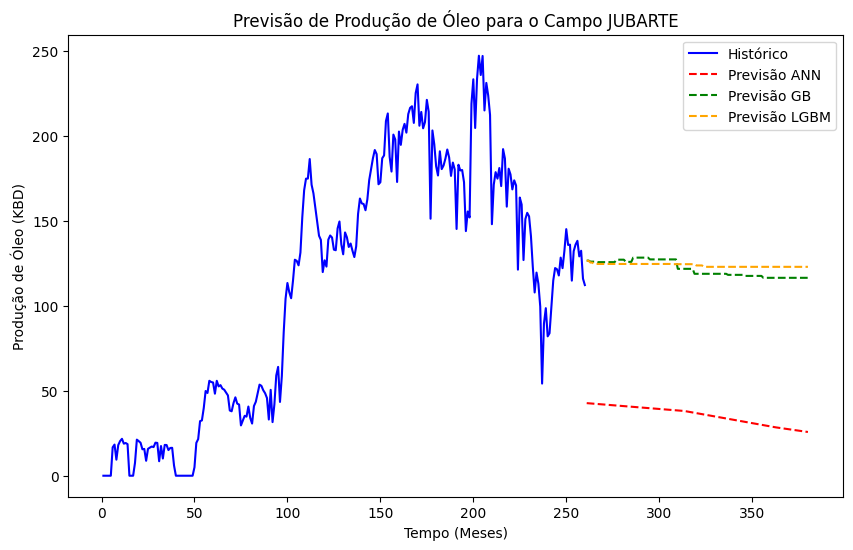

O período máximo para o campo SAPINHOÁ é: 162


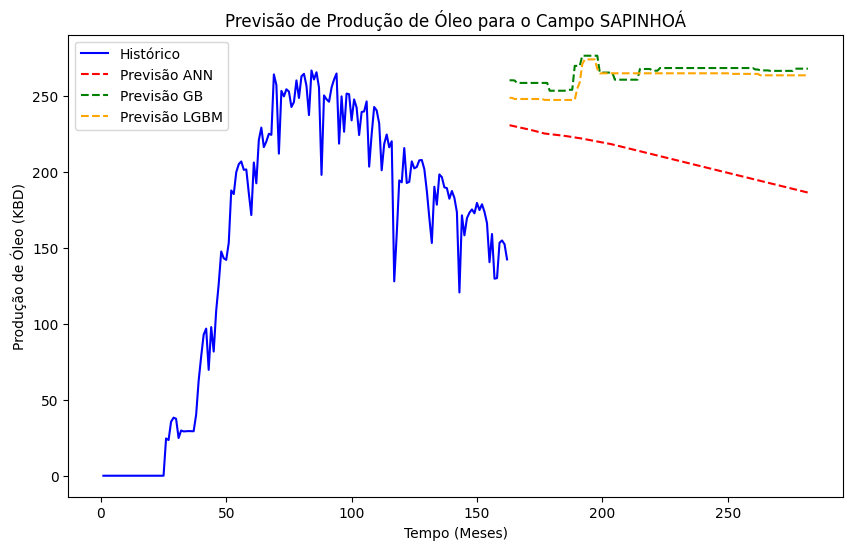

O período máximo para o campo BARRACUDA é: 321


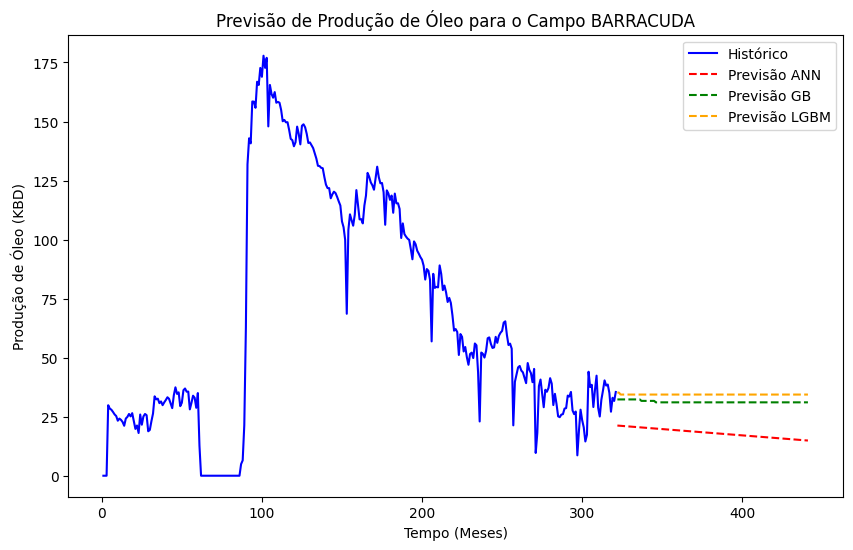

O período máximo para o campo BÚZIOS é: 128


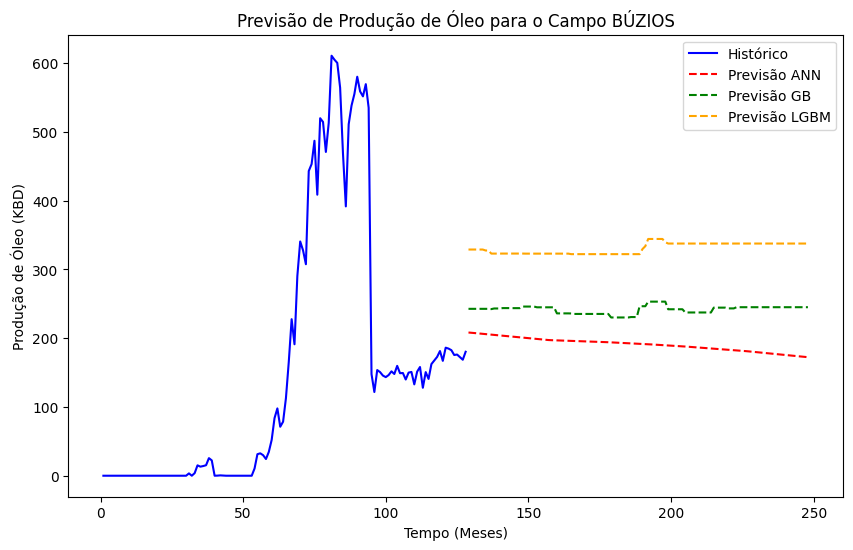

O período máximo para o campo MARLIM LESTE é: 286


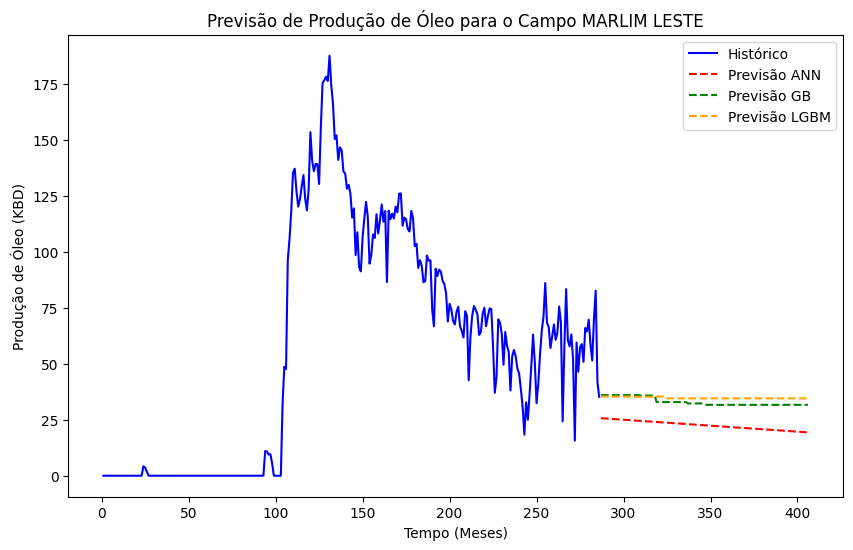

In [82]:
#campos = ['TUPI']
# campos = df_fields['campo'].unique()

# Calculando a soma de 'oleo_kbd_total' por 'campo'
campos_ordenados = df_fields.groupby('campo')['oleo_kbd_total'].sum().sort_values(ascending=False)

# Criando a lista de campos ordenados de acordo com a soma de 'oleo_kbd_total'
campos_lista_ordenada = campos_ordenados.index.tolist()

# Codificando as variáveis 'campo', 'gas_natural_mmscf_total_total', e 'agua_kbd_total' com One-Hot Encoding
X = df_fields[['tempo_total_producao_meses', 'campo', 'gas_natural_mmscf_total_total', 'agua_kbd_total']]  # Adicionando mais features
y = df_fields['oleo_kbd_total']  # Alvo: produção de óleo

# Codificando variáveis categóricas e contínuas com One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Gerando previsões para os próximos 120 meses para cada campo
for campo in campos_lista_ordenada[:10]:
    # Filtrando o dataframe para o campo específico
    df_campo = df_fields[df_fields['campo'] == campo]

    # Encontrando o período máximo para esse campo
    periodo_maximo = df_campo['tempo_total_producao_meses'].max()
    print(f"O período máximo para o campo {campo} é: {periodo_maximo}")

    # Criando os dados para os próximos 120 meses
    num_meses_futuro = 120
    tempo_total_producao_meses = periodo_maximo + 1  # Tempo inicial (último mês + 1)

    # Criando os dados para prever os próximos 120 meses
    X_futuro = pd.DataFrame({
        'tempo_total_producao_meses': [tempo_total_producao_meses + i for i in range(num_meses_futuro)],  # 120 meses
        'campo': [campo] * num_meses_futuro,  # Repetindo o campo para todos os meses
        'gas_natural_mmscf_total_total': [df_campo['gas_natural_mmscf_total_total'].mean()] * num_meses_futuro,  # Assumindo valores médios para outras features
        'agua_kbd_total': [df_campo['agua_kbd_total'].mean()] * num_meses_futuro  # Assumindo valores médios para outras features
    })

    # Aplicando o One-Hot Encoding para as variáveis
    X_futuro = pd.get_dummies(X_futuro, drop_first=True)

    # Garantindo que as colunas de X_futuro correspondam exatamente às de X (no caso da codificação)
    X_futuro = X_futuro.reindex(columns=X.columns, fill_value=0)

    # Usando o modelo treinado para fazer a previsão para os próximos 120 meses com a rede neural
    y_futuro_ann = model_ann_b.predict(X_futuro)

    # Usando o modelo treinado para fazer a previsão para os próximos 120 meses com o modelo de Gradient Boosting
    y_futuro_gb = model_gb_b.predict(X_futuro)

    # Usando o modelo treinado para fazer a previsão para os próximos 120 meses com o modelo LightGBM
    y_futuro_lgbm = model_lgbm_b.predict(X_futuro)

    # Exibindo o gráfico com o histórico e as previsões futuras
    plt.figure(figsize=(10, 6))
    plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total'], label='Histórico', color='blue')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro_ann, label='Previsão ANN', color='red', linestyle='--')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro_gb, label='Previsão GB', color='green', linestyle='--')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro_lgbm, label='Previsão LGBM', color='orange', linestyle='--')
    plt.xlabel('Tempo (Meses)')
    plt.ylabel('Produção de Óleo (KBD)')
    plt.title(f'Previsão de Produção de Óleo para o Campo {campo}')
    plt.legend()
    plt.show()

#### Comparação de precisão dos modelos

In [83]:
# Criando um dicionário com os resultados dos modelos
results = {
    'Modelo': ['Gradient Boosting', 'LGBM', 'Redes Neurais'],
    'MAE': [mae_gboost_b, mae_lgbm_b, mae_ann_b],
    'MSE': [mse_gboost_b, mse_lgbm_b, mse_ann_b],
    'R2': [r2_gboost_b, r2_lgbm_b, r2_ann_b]
}

# Criando um DataFrame com os resultados
df_results_v2 = pd.DataFrame(results)
display(df_results_v2)

,Modelo,MAE,MSE,R2
0,Gradient Boosting,7.875707,874.268633,0.865617
1,LGBM,8.828655,944.269084,0.854857
2,Redes Neurais,8.042834,345.850263,0.946840


### Otimização - Hyperparameter Tuning

In [84]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

#### 2.c Gradient Boosting

A busca dos hyperparametros foi comentada para que o código seja executado rapidamente, porem o melhor resultado será utilizado e suas métricas de erro R², MAE e MSE estão demonstradas.

Melhores parâmetros: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 6,
'learning_rate': 0.2, 'colsample_bytree': 0.8}

In [85]:
# Definindo o modelo
best_params_gb =   {'subsample': 0.7, 'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

# Criar e configurar o modelo Gradient Boosting
model_gb_c = XGBRegressor(**best_params_gb)

# Treinar o modelo
model_gb_c.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_gb_c.predict(X_test)

# Avaliar o modelo
mae_gboost_c = mean_absolute_error(y_test, y_pred)
mse_gboost_c = mean_squared_error(y_test, y_pred)
r2_gboost_c = r2_score(y_test, y_pred)

# Exibir métricas de avaliação
print(f"MAE: {mae_gboost_c:.3f}")
print(f"MSE: {mse_gboost_c:.3f}")
print(f"R²: {r2_gboost_c:.3f}")



# COMENTADO PARA OTIMIZAR A EXECUÇÃO DO NOTEBOOK

"""
# Código para testar Hyperparametros
# Definindo o modelo base
model_gb_c = XGBRegressor(random_state=42)

# Definindo o espaço de busca dos hiperparâmetros
param_distributions = {
    'n_estimators': [100, 200, 300, 600, 1200],  # Número de árvores
    'learning_rate': [0.01, 0.1, 0.2],  # Taxa de aprendizado
    'max_depth': [3, 6, 10],  # Profundidade das árvores
    'subsample': [0.7, 0.8, 1.0],  # Percentual de amostras
    'colsample_bytree': [0.7, 0.8, 1.0],  # Percentual de features
}

# Definindo o TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)  # A quantidade de splits pode ser ajustada conforme necessário

# Usando RandomizedSearchCV para explorar as combinações aleatórias de parâmetros
random_search = RandomizedSearchCV(
    estimator=model_gb_c,
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinações aleatórias
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_mean_squared_error',  # Usando MSE negativo (scikit-learn usa o valor negativo para maximizar)
    n_jobs=-1,  # Usar todos os núcleos de CPU disponíveis
    verbose=1,
    random_state=42
)

# Treinando o modelo com RandomizedSearchCV
random_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros
best_params = random_search.best_params_
print(f"Melhores parâmetros: {best_params}")

# Criando o modelo com os melhores parâmetros encontrados
best_model = random_search.best_estimator_

# Fazendo previsões no conjunto de teste com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliando o modelo
mae_gboost_c = mean_absolute_error(y_test, y_pred)
mse_gboost_c = mean_squared_error(y_test, y_pred)
r2_gboost_c = r2_score(y_test, y_pred)

# Exibindo as métricas
print(f'MAE: {mae_gboost_c}')
print(f'MSE: {mse_gboost_c}')
print(f'R²: {r2_gboost_c}')
"""

MAE: 9.332
MSE: 529.033
R²: 0.919


'\n# Código para testar Hyperparametros\n# Definindo o modelo base\nmodel_gb_c = XGBRegressor(random_state=42)\n\n# Definindo o espaço de busca dos hiperparâmetros\nparam_distributions = {\n    \'n_estimators\': [100, 200, 300, 600, 1200],  # Número de árvores\n    \'learning_rate\': [0.01, 0.1, 0.2],  # Taxa de aprendizado\n    \'max_depth\': [3, 6, 10],  # Profundidade das árvores\n    \'subsample\': [0.7, 0.8, 1.0],  # Percentual de amostras\n    \'colsample_bytree\': [0.7, 0.8, 1.0],  # Percentual de features\n}\n\n# Definindo o TimeSeriesSplit para validação cruzada\ntscv = TimeSeriesSplit(n_splits=5)  # A quantidade de splits pode ser ajustada conforme necessário\n\n# Usando RandomizedSearchCV para explorar as combinações aleatórias de parâmetros\nrandom_search = RandomizedSearchCV(\n    estimator=model_gb_c,\n    param_distributions=param_distributions,\n    n_iter=20,  # Número de combinações aleatórias\n    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada\n    scoring

#### 4.c Rede Neural

A busca dos hyperparametros foi comentada para que o código seja executado rapidamente, porem o melhor resultado será utilizado e suas métricas de erro R², MAE e MSE estão demonstradas.

In [86]:
best_params_ann = {'solver': 'adam',
                   'max_iter': 600,
                   'learning_rate': 'adaptive',
                   'hidden_layer_sizes': (100,),
                   'batch_size': 'auto',
                   'alpha': 0.0001,
                   'activation': 'relu'}

# Criando e treinando o modelo de rede neural com múltiplas camadas
model_ann_c = MLPRegressor(**best_params_ann)

# Treinando o modelo
model_ann_c.fit(X_train, y_train)

# Fazendo previsões
y_pred_ann_multi = model_ann_c.predict(X_test)

# Avaliando o modelo
mae_ann_c = mean_absolute_error(y_test, y_pred_ann_multi)
mse_ann_c = mean_squared_error(y_test, y_pred_ann_multi)
r2_ann_c = r2_score(y_test, y_pred_ann_multi)

# Exibindo as métricas
print(f'MAE (Multilayer): {mae_ann_c}')
print(f'MSE (Multilayer): {mse_ann_c}')
print(f'R² (Multilayer): {r2_ann_c}')


# COMENTADO PARA OTIMIZAR A EXECUÇÃO DO NOTEBOOK (Demora aprox 8 horas no Colab e muitas vezes dá crash)

"""
# Definindo o modelo base
model_ann_c = MLPRegressor(random_state=42)

# Definindo o espaço de busca dos hiperparâmetros
param_distributions = {
    'hidden_layer_sizes': [(100,)],  # Camadas ocultas
    'max_iter': [200, 600, 1000],  # Número de iterações
    'learning_rate': ['adaptive'],  # Taxa de aprendizado
    'activation': ['relu', 'tanh'],  # Funções de ativação
    'solver': ['adam', 'lbfgs'],  # Algoritmos de otimização
    'alpha': [0.0001],  # Regularização L2
    'batch_size': ['auto', 32, 64]  # Tamanho do lote
}

# Definindo a validação cruzada TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # 5 splits pode ser ajustado conforme necessário

# Usando RandomizedSearchCV com TimeSeriesSplit
random_search_ann = RandomizedSearchCV(
    estimator=model_ann_c,
    param_distributions=param_distributions,
    n_iter=10,  # Número de tentativas aleatórias
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Treinando o modelo com RandomizedSearchCV
random_search_ann.fit(X_train, y_train)

# Obtendo os melhores parâmetros
best_params_ann = random_search_ann.best_params_
print(f"Melhores parâmetros da rede neural: {best_params_ann}")

# Criando o modelo com os melhores parâmetros encontrados
best_model_ann = random_search_ann.best_estimator_

# Fazendo previsões no conjunto de teste com o melhor modelo
y_pred_ann_multi = best_model_ann.predict(X_test)

# Avaliando o modelo
mae_ann_c = mean_absolute_error(y_test, y_pred_ann_multi)
mse_ann_c = mean_squared_error(y_test, y_pred_ann_multi)
r2_ann_c = r2_score(y_test, y_pred_ann_multi)

# Exibindo as métricas
print(f'MAE (Multilayer): {mae_ann_c}')
print(f'MSE (Multilayer): {mse_ann_c}')
print(f'R² (Multilayer): {r2_ann_c}')
"""

MAE (Multilayer): 7.966118089136473
MSE (Multilayer): 592.7266771022724
R² (Multilayer): 0.9088922381051628


'\n# Definindo o modelo base\nmodel_ann_c = MLPRegressor(random_state=42)\n\n# Definindo o espaço de busca dos hiperparâmetros\nparam_distributions = {\n    \'hidden_layer_sizes\': [(100,)],  # Camadas ocultas\n    \'max_iter\': [200, 600, 1000],  # Número de iterações\n    \'learning_rate\': [\'adaptive\'],  # Taxa de aprendizado\n    \'activation\': [\'relu\', \'tanh\'],  # Funções de ativação\n    \'solver\': [\'adam\', \'lbfgs\'],  # Algoritmos de otimização\n    \'alpha\': [0.0001],  # Regularização L2\n    \'batch_size\': [\'auto\', 32, 64]  # Tamanho do lote\n}\n\n# Definindo a validação cruzada TimeSeriesSplit\ntscv = TimeSeriesSplit(n_splits=5)  # 5 splits pode ser ajustado conforme necessário\n\n# Usando RandomizedSearchCV com TimeSeriesSplit\nrandom_search_ann = RandomizedSearchCV(\n    estimator=model_ann_c,\n    param_distributions=param_distributions,\n    n_iter=10,  # Número de tentativas aleatórias\n    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada\n    sco

#### Comparação de precisão dos modelos

In [87]:
# Criando um dicionário com os resultados dos modelos
results = {
    'Modelo': ['Gradient Boosting', 'Redes Neurais'],
    'MAE': [mae_gboost_c, mae_ann_c],
    'MSE': [mse_gboost_c, mse_ann_c],
    'R2': [r2_gboost_c, r2_ann_c]
}

# Criando um DataFrame com os resultados
df_results_v3 = pd.DataFrame(results)
display(df_results_v3)

,Modelo,MAE,MSE,R2
0,Gradient Boosting,9.331914,529.033422,0.918683
1,Redes Neurais,7.966118,592.726677,0.908892


# Avaliação de Resultados

A avaliação dos modelos foi conduzida com base em métricas apropriadas para regressão:

  - MAE (Mean Absolute Error): Média do erro absoluto entre os valores reais e previstos.
  - MSE (Mean Squared Error): Penalização de erros maiores devido ao seu quadrado.
  - R² (Coeficiente de Determinação): Medida da proporção de variação explicada pelo modelo.

In [88]:
df_results_v1['Versão'] = 'v1'
df_results_v2['Versão'] = 'v2'
df_results_v3['Versão'] = 'v3'

# Concatenar os DataFrames
df_combined = pd.concat([df_results_v1, df_results_v2, df_results_v3], ignore_index=True)

# Reorganizar as colunas para uma visualização mais clara
df_combined = df_combined[['Versão', 'Modelo', 'MAE', 'MSE', 'R2']]

display(df_combined)

,Versão,Modelo,MAE,MSE,R2
0,v1,LGBM,10.558746,845.239552,0.851602
1,v1,Gradient Boosting,8.187737,406.766246,0.928584
2,v1,Regressão Linear,21.768065,2231.912665,0.608146
3,v1,Redes Neurais,28.773354,1710.535861,0.699683
4,v2,Gradient Boosting,7.875707,874.268633,0.865617
5,v2,LGBM,8.828655,944.269084,0.854857
6,v2,Redes Neurais,8.042834,345.850263,0.946840
7,v3,Gradient Boosting,9.331914,529.033422,0.918683
8,v3,Redes Neurais,7.966118,592.726677,0.908892


## Prevendo a produção com os modelos selecionados

O período máximo para o campo TUPI é: 182


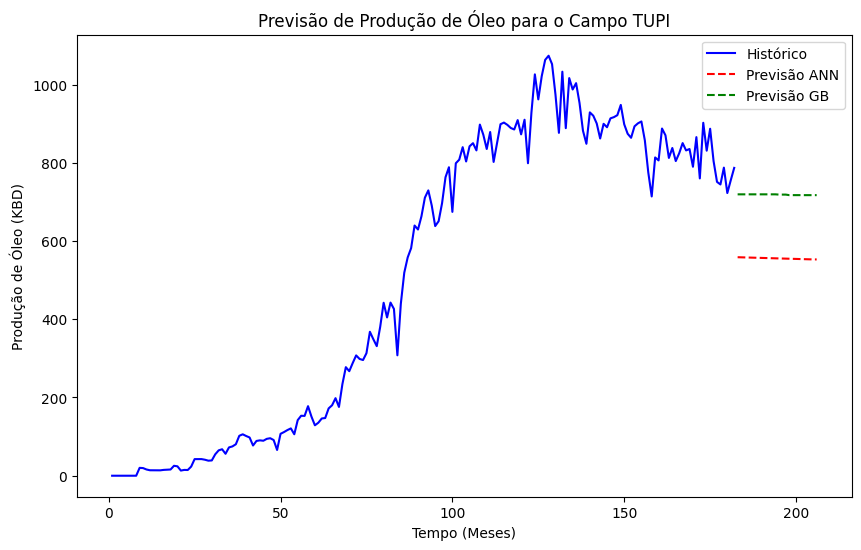

O período máximo para o campo BÚZIOS_ECO é: 33


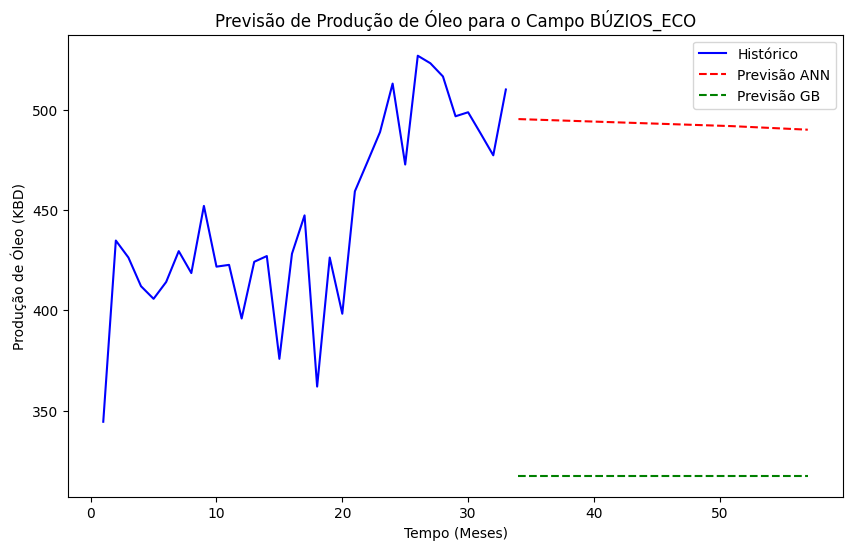

O período máximo para o campo MERO é: 80


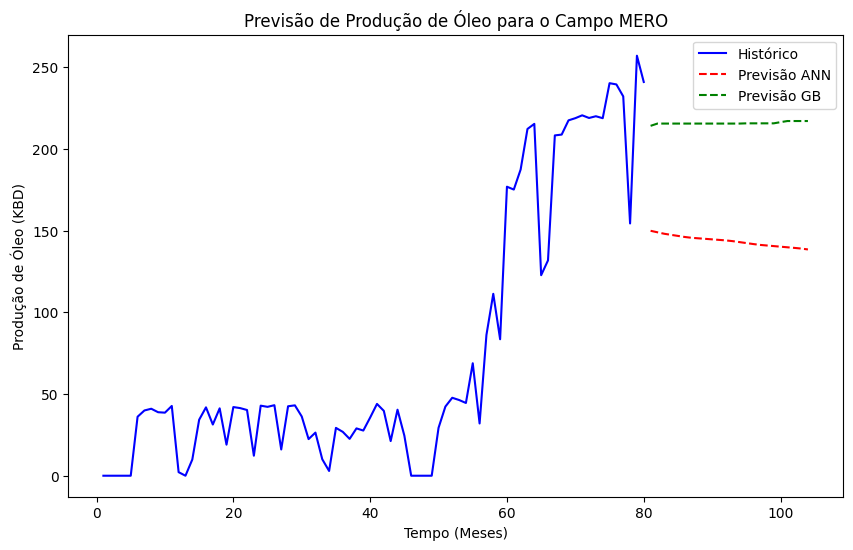

O período máximo para o campo BÚZIOS é: 128


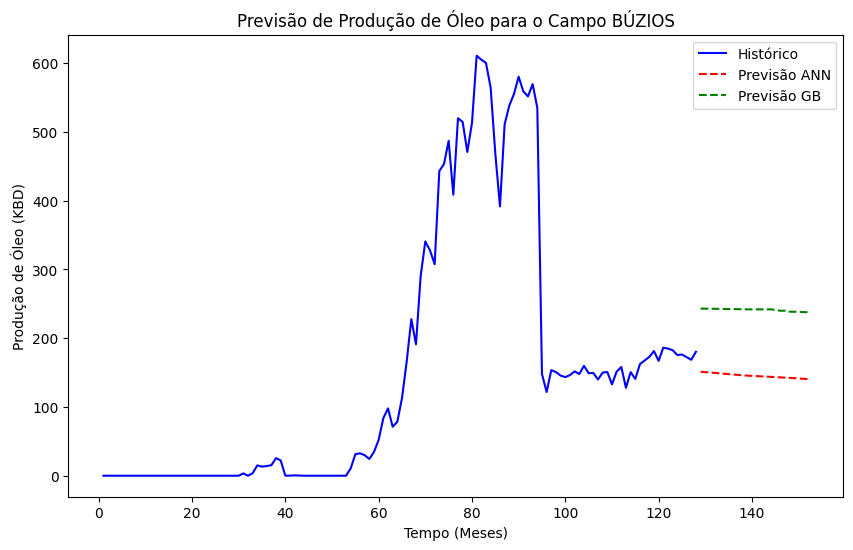

O período máximo para o campo SAPINHOÁ é: 162


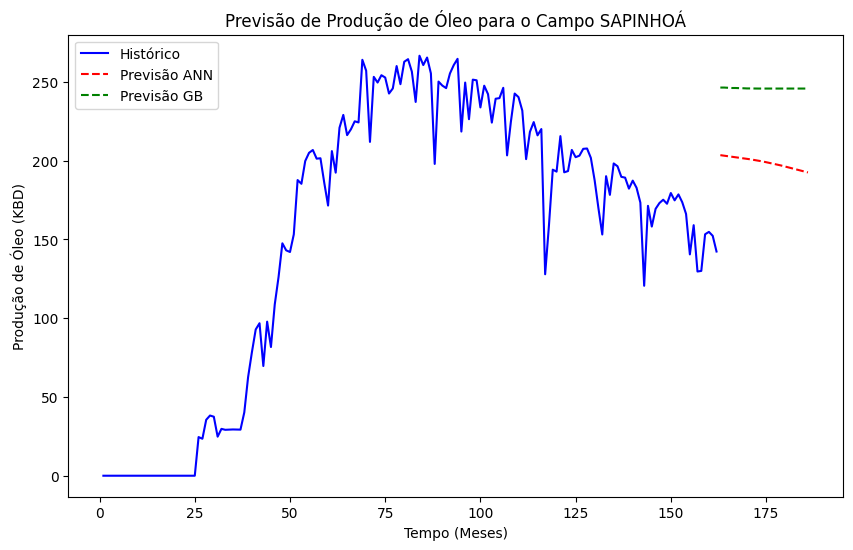

O período máximo para o campo JUBARTE é: 260


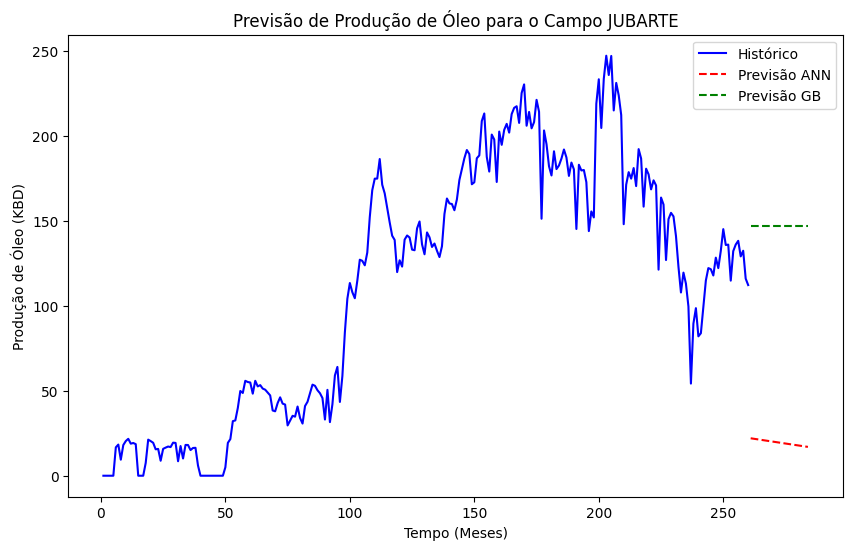

O período máximo para o campo RONCADOR é: 305


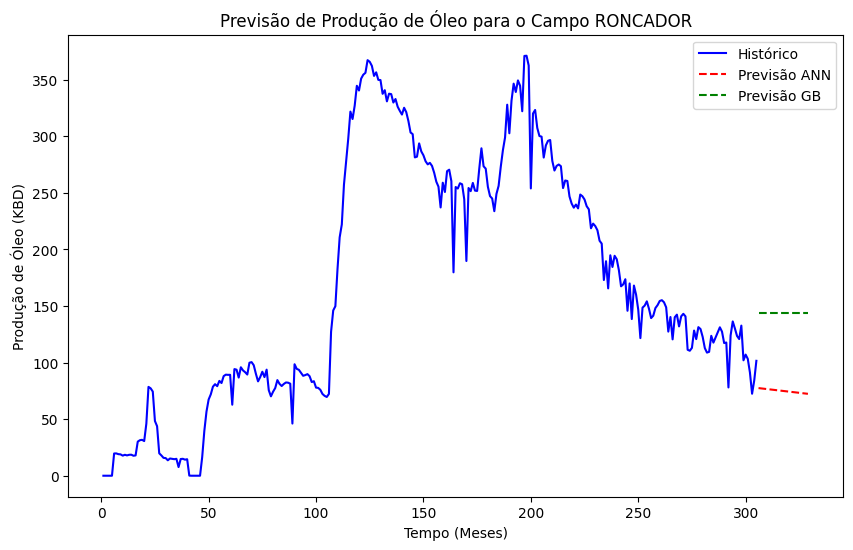

O período máximo para o campo SÉPIA_ECO é: 25


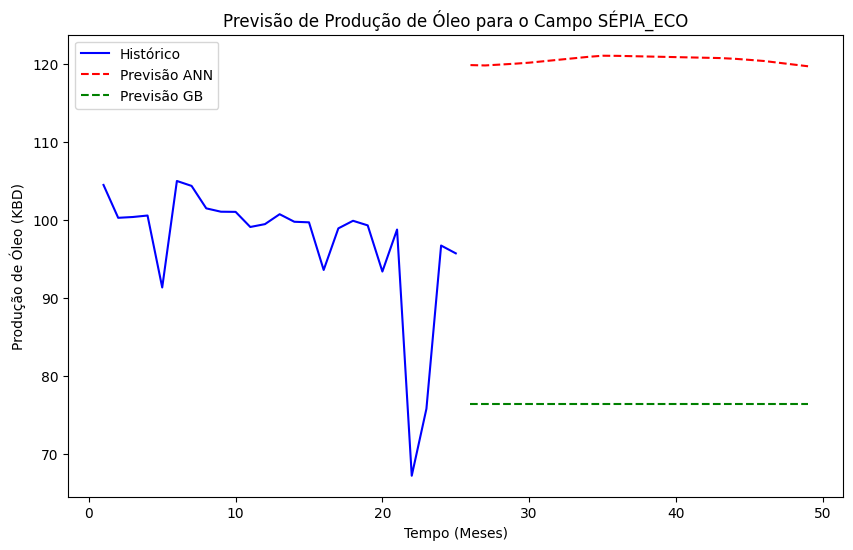

O período máximo para o campo PEREGRINO é: 158


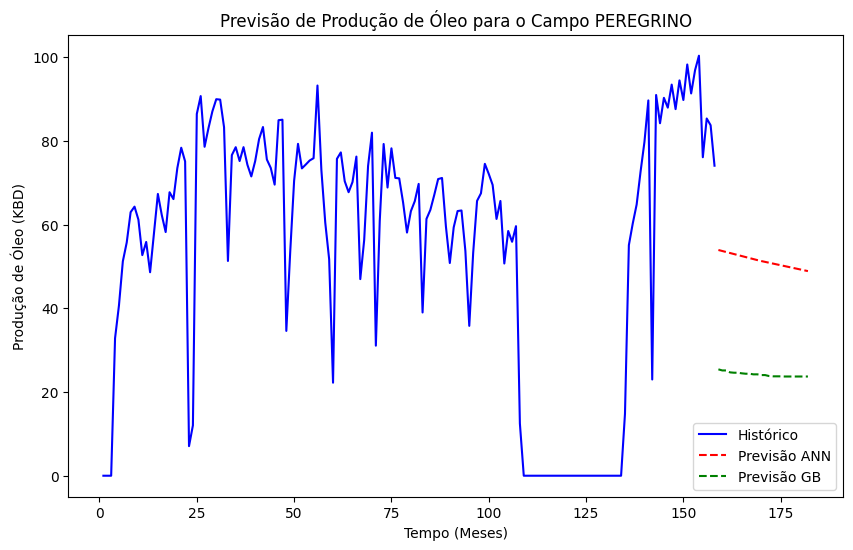

O período máximo para o campo MARLIM SUL é: 362


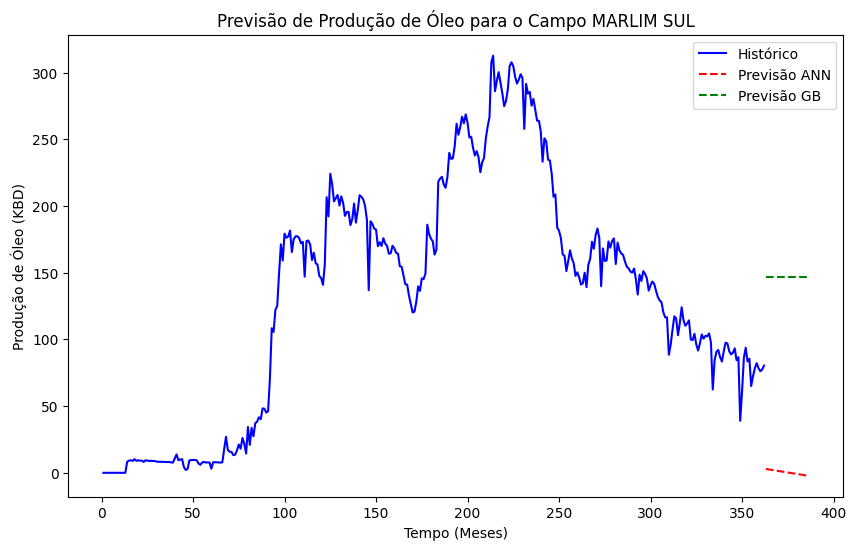

In [125]:
# Gerando previsões para os próximos 24 meses para cada campo
for campo in ['TUPI', 'BÚZIOS_ECO', 'MERO', 'BÚZIOS', 'SAPINHOÁ', 'JUBARTE', 'RONCADOR', 'SÉPIA_ECO', 'PEREGRINO', 'MARLIM SUL']:
    # Filtrando o dataframe para o campo específico
    df_campo = df_fields[df_fields['campo'] == campo]

    # Encontrando o período máximo para esse campo
    periodo_maximo = df_campo['tempo_total_producao_meses'].max()
    print(f"O período máximo para o campo {campo} é: {periodo_maximo}")

    # Criando os dados para os próximos 120 meses
    num_meses_futuro = 24
    tempo_total_producao_meses = periodo_maximo + 1  # Tempo inicial (último mês + 1)

    # Criando os dados para prever os próximos 120 meses
    X_futuro = pd.DataFrame({
        'tempo_total_producao_meses': [tempo_total_producao_meses + i for i in range(num_meses_futuro)],
        'campo': [campo] * num_meses_futuro,  # Repetindo o campo para todos os meses
        'gas_natural_mmscf_total_total': [df_campo['gas_natural_mmscf_total_total'].mean()] * num_meses_futuro,  # Assumindo valores médios para outras features
        'agua_kbd_total': [df_campo['agua_kbd_total'].mean()] * num_meses_futuro  # Assumindo valores médios para outras features
    })

    # Aplicando o One-Hot Encoding para as variáveis
    X_futuro = pd.get_dummies(X_futuro, drop_first=True)

    # Garantindo que as colunas de X_futuro correspondam exatamente às de X (no caso da codificação)
    X_futuro = X_futuro.reindex(columns=X.columns, fill_value=0)

    # Usando o modelo treinado para fazer a previsão para os próximos 120 meses com a rede neural (ANN)
    y_futuro_ann = model_ann_c.predict(X_futuro)

    # Usando o modelo treinado para fazer a previsão para os próximos 120 meses com o modelo de Gradient Boosting (GB)
    y_futuro_gb = model_gb_c.predict(X_futuro)

    # Exibindo o gráfico com o histórico e as previsões futuras
    plt.figure(figsize=(10, 6))
    plt.plot(df_campo['tempo_total_producao_meses'], df_campo['oleo_kbd_total'], label='Histórico', color='blue')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro_ann, label='Previsão ANN', color='red', linestyle='--')
    plt.plot(X_futuro['tempo_total_producao_meses'], y_futuro_gb, label='Previsão GB', color='green', linestyle='--')
    plt.xlabel('Tempo (Meses)')
    plt.ylabel('Produção de Óleo (KBD)')
    plt.title(f'Previsão de Produção de Óleo para o Campo {campo}')
    plt.legend()
    plt.show()

# Conclusão

## Comentários Finais

O desenvolvimento deste **MVP** demonstrou a viabilidade de aplicar técnicas de **machine learning** para prever a produção futura de petróleo em campos offshore no Brasil, com base em dados históricos fornecidos pela **ANP**. Este trabalho utilizou um conjunto de dados agregados por campo e implementou diferentes modelos de regressão, com destaque para **LightGBM** e **Redes Neurais**, que obtiveram os melhores desempenhos em métricas como **R²**, **MAE** e **MSE**. Esses resultados reforçam o potencial de modelos baseados em aprendizado de máquina para fornecer previsões confiáveis no setor de óleo e gás, mesmo em um estágio inicial do projeto.

---

Além do desempenho técnico, o **MVP** destacou a importância de uma abordagem estruturada para o **pré-processamento** e **análise exploratória** dos dados, incluindo a agregação de informações distribuídas em múltiplos arquivos mensais e regionais. A **padronização das variáveis** foi crucial para a construção de modelos eficientes, especialmente no caso da **rede neural**, onde normalizar os dados contribuiu para melhorar a **estabilidade** e a **convergência** do modelo.

---

Os modelos também foram beneficiados pela inclusão de variáveis relacionadas à produção de **gás** e **água**, elementos que enriqueceram as previsões ao capturar a complexidade da operação de campos de petróleo. Embora modelos como a **Regressão Linear** não tenham alcançado o mesmo nível de desempenho que os métodos baseados em **boosting**, eles forneceram **insights valiosos** sobre as relações entre as variáveis, complementando a análise geral.

---

Este trabalho enfatiza a importância de uma abordagem **iterativa** e **colaborativa**, integrando a **ciência de dados** com o **conhecimento técnico** do domínio para alcançar previsões robustas e confiáveis. Além disso, ele marca um passo importante no uso de **dados abertos** e **metodologias avançadas** para resolver problemas reais da indústria, contribuindo para uma **gestão mais informada** e **eficiente** dos recursos naturais.

Existem oportunidades de refinar ainda mais os resultados e explorar o **potencial completo das técnicas de modelagem** para desafios no setor de petróleo e gás.


## Proposições futuras e sugestões de melhorias

Apesar do desempenho satisfatório, há um **potencial significativo para melhorias** com base nas sugestões a seguir:

---

1. **Normalização**

   Embora a metodologia adotada tenha sido bem-sucedida sem o uso de normalização, há uma **hipótese** de que a normalização poderia melhorar a performance do modelo, especialmente para as **Redes Neurais**. Como as redes neurais são mais sensíveis à escala dos dados, um teste mais robusto de normalização poderia fornecer insights valiosos sobre o impacto dessa transformação no desempenho preditivo. A ideia seria comparar os resultados obtidos com e sem normalização para avaliar se essa etapa poderia melhorar a acurácia, ou se, ao contrário, a normalização prejudica o aprendizado do modelo.

   No entanto, devido a **limitações de tempo e recursos computacionais**, principalmente com o uso do **Google Colab**, não foi possível realizar esses testes mais aprofundados. **Modelos como Redes Neurais** exigem considerável poder de processamento e tempo de treinamento, o que dificultaria realizar uma análise mais abrangente dentro do prazo do projeto.

---

2. **Aumento da granularidade dos dados**

   Utilizar **dados em nível de poço** ao invés de campo pode levar a previsões mais precisas.

   Atualmente, os dados estão agregados por **campo**, o que pode mascarar comportamentos individuais de poços específicos.
   Dados por **poço** permitem capturar nuances como **taxas de produção específicas**, **operações de manutenção** e **características geológicas**, enriquecendo o aprendizado dos modelos.
   Com maior granularidade, é esperado que modelos mais detalhados ajustem melhor os padrões de produção, reduzindo erros (**MAE** e **MSE**) e aumentando o **R²**.

---

3. **Ampliação do escopo de modelos**

   Explorar novos **algoritmos** pode revelar abordagens que superem os modelos atuais.

   - **XGBoost**: Considerado uma evolução do **Gradient Boosting**, pode oferecer melhor desempenho devido à otimização na forma como lida com árvores de decisão e regularização.
   - **SVM (Support Vector Machines)**: Pode ser útil para detectar padrões em dados mais complexos e não lineares, especialmente ao combinar diferentes variáveis no modelo.

   A adição desses modelos pode criar um **comitê de modelos (ensemble)** para melhorar a robustez das previsões.

---

4. **Segmentação dos campos por estágio de produção**

   Dividir os campos em **estágios de produção** — início, maturação e declínio — pode permitir a aplicação de modelos mais específicos a cada etapa.

   Cada estágio apresenta dinâmicas distintas, como declínios mais acentuados na fase final, que podem confundir os modelos treinados em dados mistos.
   Ao segmentar, espera-se maior adequação dos modelos e menor **erro preditivo**.

---

5. **Comparação com referências conhecidas**

   Integrar **curvas de ARPS (Arps Decline Curves)** como baseline para previsões pode ajudar na validação dos modelos.

   ARPS é amplamente utilizado na **indústria** e fornece previsões baseadas em modelos matemáticos bem estabelecidos.
   Ao comparar os resultados dos modelos com **ARPS**, é possível identificar discrepâncias e ajustar abordagens, aumentando a **confiabilidade das previsões**.

---

6. **Enriquecimento dos dados**

   Adicionar variáveis complementares, como **dados geológicos** (tipo de reservatório, porosidade, permeabilidade) e **dados econômicos** (preço do petróleo, investimentos no campo), pode aumentar a capacidade preditiva dos modelos.

   Dados adicionais fornecem **contexto** e podem explicar variações que os modelos atuais não capturam.
   O impacto esperado é a redução de **outliers** nos dados e maior **estabilidade** dos resultados.

---

### Resultados Esperados

Ao aplicar essas sugestões, espera-se:

- **Redução no MAE**: Menor **erro absoluto médio** indica previsões mais consistentes.
- **Redução no MSE**: Menor **erro quadrático médio** destaca menor variabilidade nos erros.
- **Aumento no R²**: Um valor mais próximo de **1** representa explicabilidade superior dos modelos.

---

Com ajustes como **granularidade mais detalhada**, **modelos mais diversificados** e **segmentação por estágio de produção**, os melhores modelos atuais, **LightGBM** e **Redes Neurais**, têm **potencial para superar o desempenho atual** e se aproximar de métricas mais otimizadas e aplicabilidade na indústria.
